In [1]:
from _config import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.manifold import TSNE

-------------------------------------------------
----- Environment variables from .env file: -----
-------------------------------------------------
-------------------------------------------------


In [2]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

### Start with Spring (1)

In [3]:
#Start with spring and work our way down to winter
season = 1
season_year = 2011
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids]
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2011-03-01 to 2011-05-31
Columns: 269 entries, 10000009 to 22000047
dtypes: float64(269)
memory usage: 194.1 KB


None

            10000009   1000228  11000011  11000016  11000272  13000011  \
2011-03-01  0.718829  0.504936  1.500036  1.318906  0.102799  0.527845   
2011-03-02  0.713446  0.495193  1.476182  1.211084  0.096950  0.506501   
2011-03-03  0.713798  0.494732  1.450795  1.232571  0.094710  0.498325   
2011-03-04  0.931148  0.571493  1.433776  1.388578  0.164201  0.751926   
2011-03-05  1.805893  1.190125  1.436468  1.663800  0.157289  0.726701   
...              ...       ...       ...       ...       ...       ...   
2011-05-27  0.629364  0.419805  0.456074  0.618316  0.046931  0.323960   
2011-05-28  0.665073  0.425694  0.456643  0.633741  0.048119  0.328296   
2011-05-29  0.697494  0.482822  0.476292  0.726559  0.052159  0.343038   
2011-05-30  0.695519  0.416901  0.488253  0.696173  0.050838  0.338219   
2011-05-31  0.640069  0.366481  0.500847  0.720664  0.049668  0.333949   

            13000019  13000065  13000116  13000117  ...  66000014  66000034  \
2011-03-01  0.898397  0.962329  

          2011-03-01  2011-03-02  2011-03-03  2011-03-04  2011-03-05  \
10000009   -0.053914   -0.040015   -0.029671    0.331931    1.481929   
1000228    -0.466576   -0.466537   -0.460915   -0.361785    0.500309   
11000011    1.453259    1.450569    1.421151    1.301418    0.893014   
11000016    1.103807    0.932498    0.991565    1.214239    1.255413   
11000272   -1.242414   -1.244807   -1.248382   -1.147384   -1.146174   
...              ...         ...         ...         ...         ...   
7000003    -0.297265   -0.356303   -0.306987    0.703167    2.361112   
8000001     0.150267    0.150993    0.155810    0.712856    2.759064   
9000001     1.646082    1.611635    1.682485    1.819968    1.387530   
9000015     1.541058    1.512185    1.578096    1.697992    1.280697   
22000047   -0.216604   -0.193886   -0.224830   -0.288667   -0.400443   

          2011-03-06  2011-03-07  2011-03-08  2011-03-09  2011-03-10  ...  \
10000009    0.692234    0.336248    0.282680    0.226345  

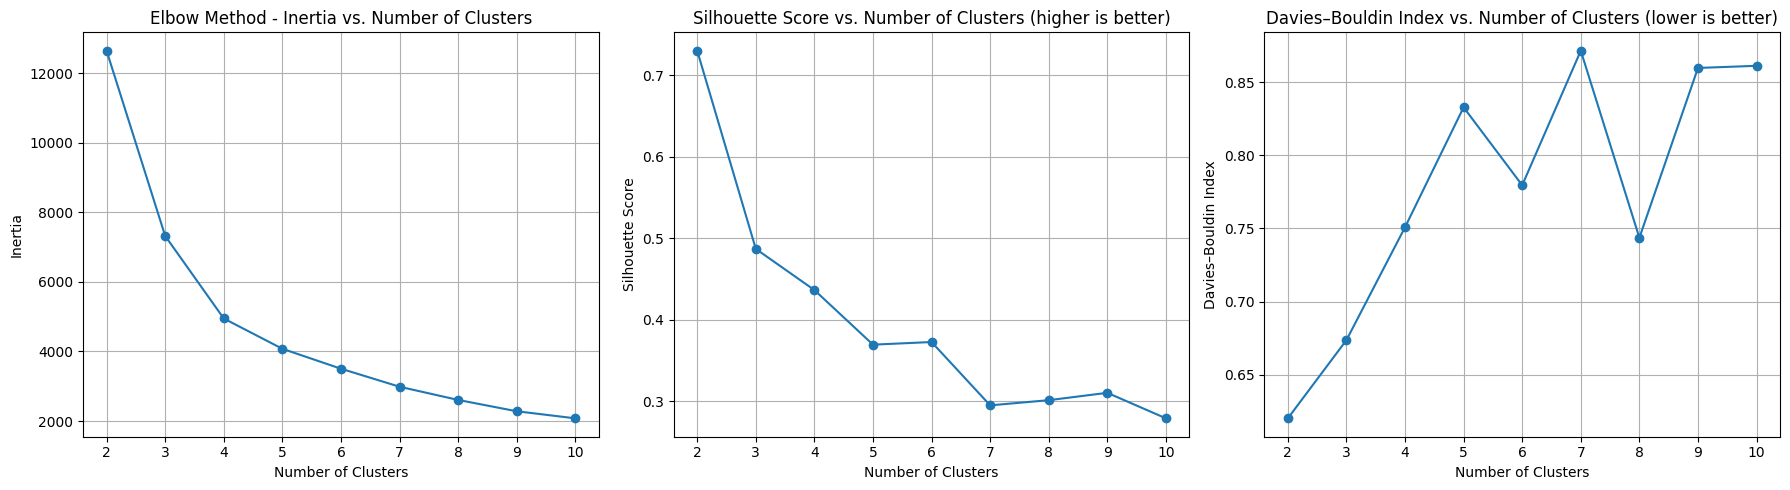

In [4]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
#import numpy as np

# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        0
1000228         0
11000011        0
11000016        0
11000272        0

            10000009   1000228  11000011  11000016  11000272  13000011  \
2011-03-01  0.718829  0.504936  1.500036  1.318906  0.102799  0.527845   
2011-03-02  0.713446  0.495193  1.476182  1.211084  0.096950  0.506501   
2011-03-03  0.713798  0.494732  1.450795  1.232571  0.094710  0.498325   
2011-03-04  0.931148  0.571493  1.433776  1.388578  0.164201  0.751926   
2011-03-05  1.805893  1.190125  1.436468  1.663800  0.157289  0.726701   
...              ...       ...       ...       ...       ...       ...   
2011-05-27  0.629364  0.419805  0.456074  0.618316  0.046931  0.323960   
2011-05-28  0.665073  0.425694  0.456643  0.633741  0.048119  0.328296   
2011-05-29  0.697494  0.482822  0.476292  0.726559  0.052159  0.343038   
2011-05-30  0.695519  0.416901  0.488253  0.696173  0.050838  0.338219   
2011-05-31  0.640069  0.366481  0.500847  0.720664  0.049668  0.333949   

            13000019  13000065  13000116  13000117  ...  66000014  66000034  \
2011-03-01  0.898397  0.962329  

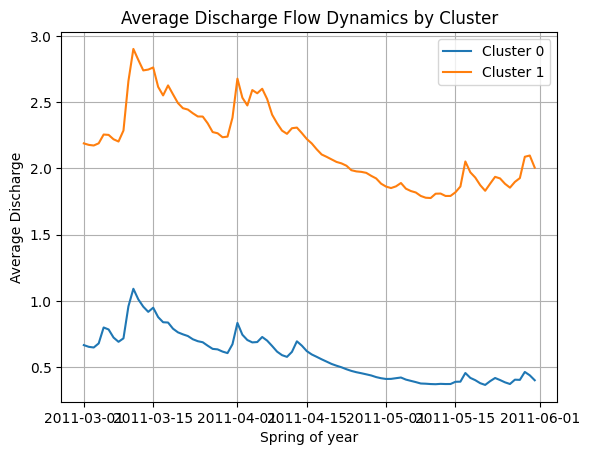

In [5]:
kmeans_final = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure()
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Spring of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)
#print(out_path)

In [7]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009   1000228  11000011  11000016  11000272  13000011  \
2011-03-01  0.718829  0.504936  1.500036  1.318906  0.102799  0.527845   
2011-03-02  0.713446  0.495193  1.476182  1.211084  0.096950  0.506501   
2011-03-03  0.713798  0.494732  1.450795  1.232571  0.094710  0.498325   
2011-03-04  0.931148  0.571493  1.433776  1.388578  0.164201  0.751926   
2011-03-05  1.805893  1.190125  1.436468  1.663800  0.157289  0.726701   
...              ...       ...       ...       ...       ...       ...   
2011-05-27  0.629364  0.419805  0.456074  0.618316  0.046931  0.323960   
2011-05-28  0.665073  0.425694  0.456643  0.633741  0.048119  0.328296   
2011-05-29  0.697494  0.482822  0.476292  0.726559  0.052159  0.343038   
2011-05-30  0.695519  0.416901  0.488253  0.696173  0.050838  0.338219   
2011-05-31  0.640069  0.366481  0.500847  0.720664  0.049668  0.333949   

            13000019  13000065  13000116  13000117  ...  66000014  66000034  \
2011-03-01  0.898397  0.962329  0.823896  0.607071  ...  0.554659  1.114451   
2011-03-02  0.867507  0.933984  0.797388  0.586527  ...  0.552377  1.109073   
2011-03-03  0.865265  0.931927  0.787234  0.578658  ...  0.557323  1.117677   
2011-03-04  1.195839  1.235268  1.102187  0.822750  ...  0.562942  1.126151   
2011-03-05  1.416243  1.437516  1.070860  0.798471  ...  0.649815  1.447977   
...              ...       ...       ...       ...  ...       ...       ...   
2011-05-27  0.516034  0.611465  0.784611  0.406652  ...  0.168711  0.571850   
2011-05-28  0.547766  0.640583  0.930531  0.412532  ...  0.157117  0.551606   
2011-05-29  0.584595  0.674378  0.957847  0.432593  ...  0.160383  0.553825   
2011-05-30  0.568095  0.659237  0.848194  0.435603  ...  0.150168  0.546415   
2011-05-31  0.536545  0.630286  0.804693  0.433383  ...  0.139898  0.524935   

            67000017  67000018  67000019   7000003   8000001   9000001  \
2011-03-01  0.635664  0.416231  0.663482  0.592694  0.824661  1.599981   
2011-03-02  0.618894  0.411917  0.666470  0.551601  0.811186  1.558601   
2011-03-03  0.622570  0.418747  0.658112  0.572925  0.808020  1.583549   
2011-03-04  0.634784  0.424078  0.660818  1.123614  1.128638  1.702617   
2011-03-05  0.715299  0.541372  0.737719  2.357403  2.607037  1.746677   
...              ...       ...       ...       ...       ...       ...   
2011-05-27  0.166622  0.151369  0.175333  0.340726  0.444191  0.925799   
2011-05-28  0.174283  0.139309  0.185087  0.357886  0.446268  0.925993   
2011-05-29  0.127173  0.140632  0.184318  0.381172  0.481506  0.961910   
2011-05-30  0.123852  0.136245  0.169542  0.379994  0.472776  0.977677   
2011-05-31  0.122801  0.122666  0.128422  0.343369  0.446660  0.940271   

             9000015  22000047  
2011-03-01  1.545544  0.634503  
2011-03-02  1.507712  0.634710  
2011-03-03  1.530521  0.614660  
2011-03-04  1.639379  0.609401  
2011-03-05  1.679661  0.625085  
...              ...       ...  
2011-05-27  0.929170  0.295261  
2011-05-28  0.929348  0.304560  
2011-05-29  0.962185  0.320956  
2011-05-30  0.976600  0.334275  
2011-05-31  0.942401  0.363718  

[92 rows x 269 columns]

<Axes: >

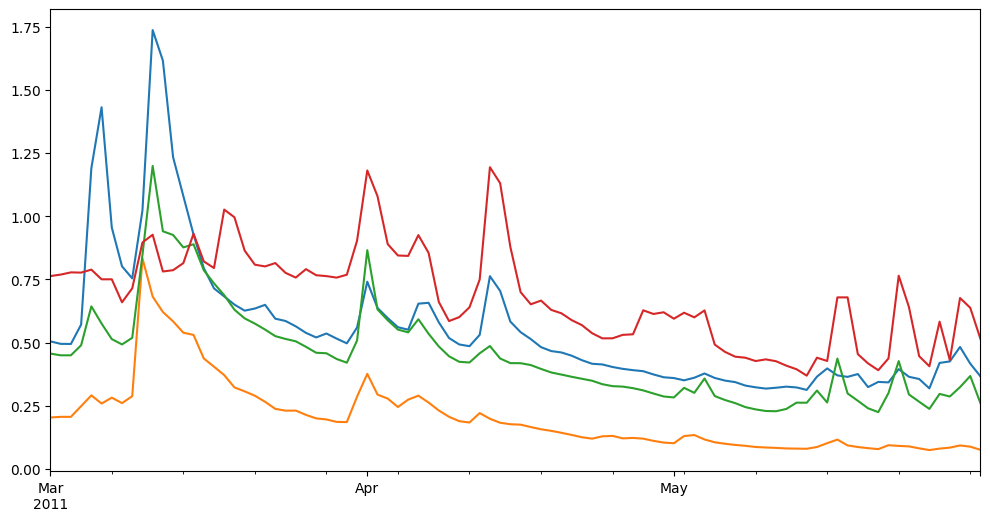

In [8]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

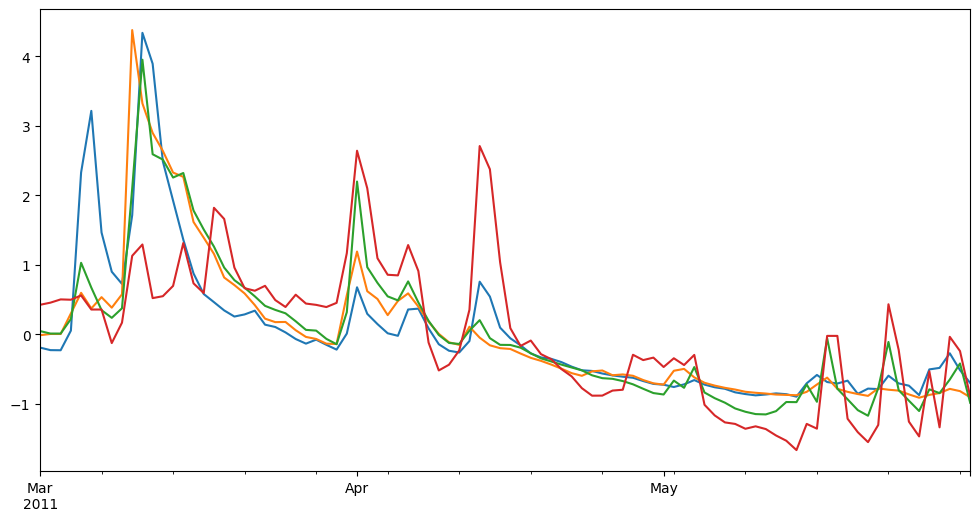

In [9]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

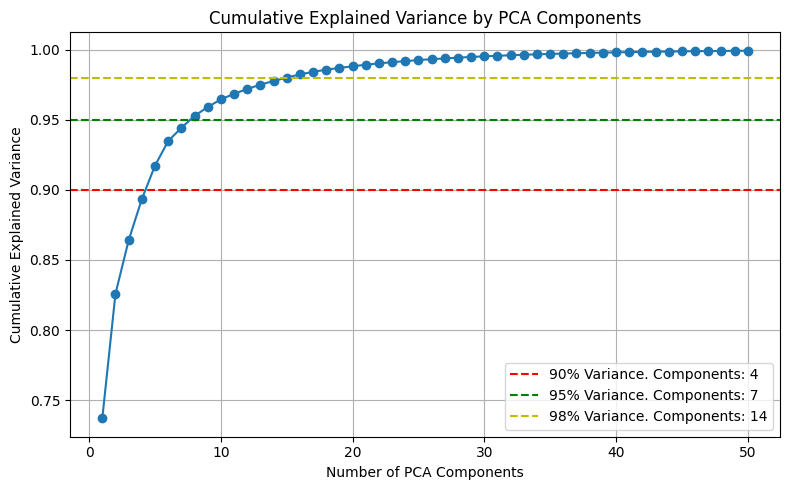

In [10]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [11]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[ 7.31848513e+00,  7.38568582e-01, -5.45445798e+00, ...,
        -1.36065982e-01, -2.77622247e-01,  3.95832203e-02],
       [ 6.36719662e+00,  7.26795853e-01, -5.58140877e+00, ...,
         6.55669626e-03, -2.18829291e-01, -2.13418951e-02],
       [ 5.97260341e+00,  4.90369815e-01, -5.23779003e+00, ...,
        -1.34584133e-01, -1.41826289e-01,  2.96700850e-01],
       ...,
       [-8.69275956e+00,  4.10752118e+00,  7.39913722e+00, ...,
        -1.22527034e+00, -3.00461374e-01,  6.00978086e-01],
       [-1.05325072e+01,  4.01657985e+00,  5.01516846e+00, ...,
        -3.21958936e-01, -5.84153939e-02,  7.35706151e-01],
       [-1.40238802e+01,  3.86757944e+00,  1.75279952e+00, ...,
        -6.49942034e-01,  3.04818294e-01, -2.49589998e-01]],
      shape=(92, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_3456\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


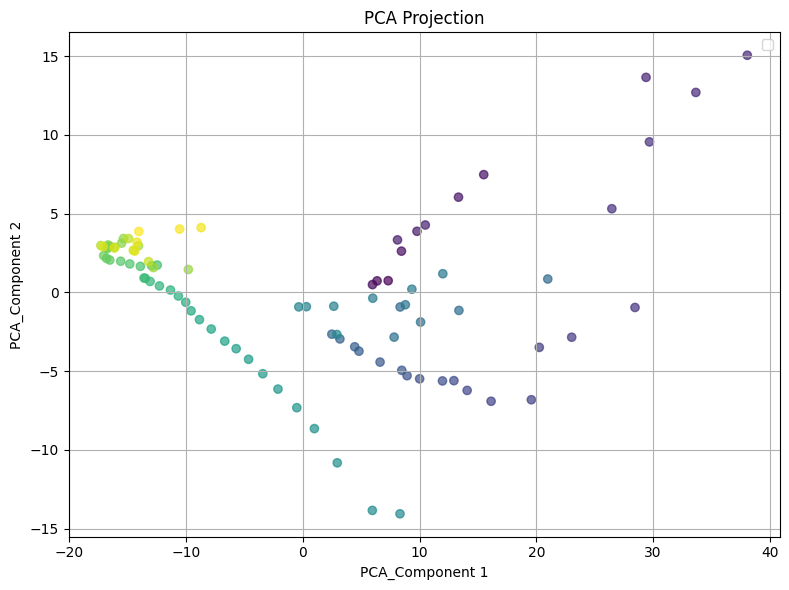

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_3456\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


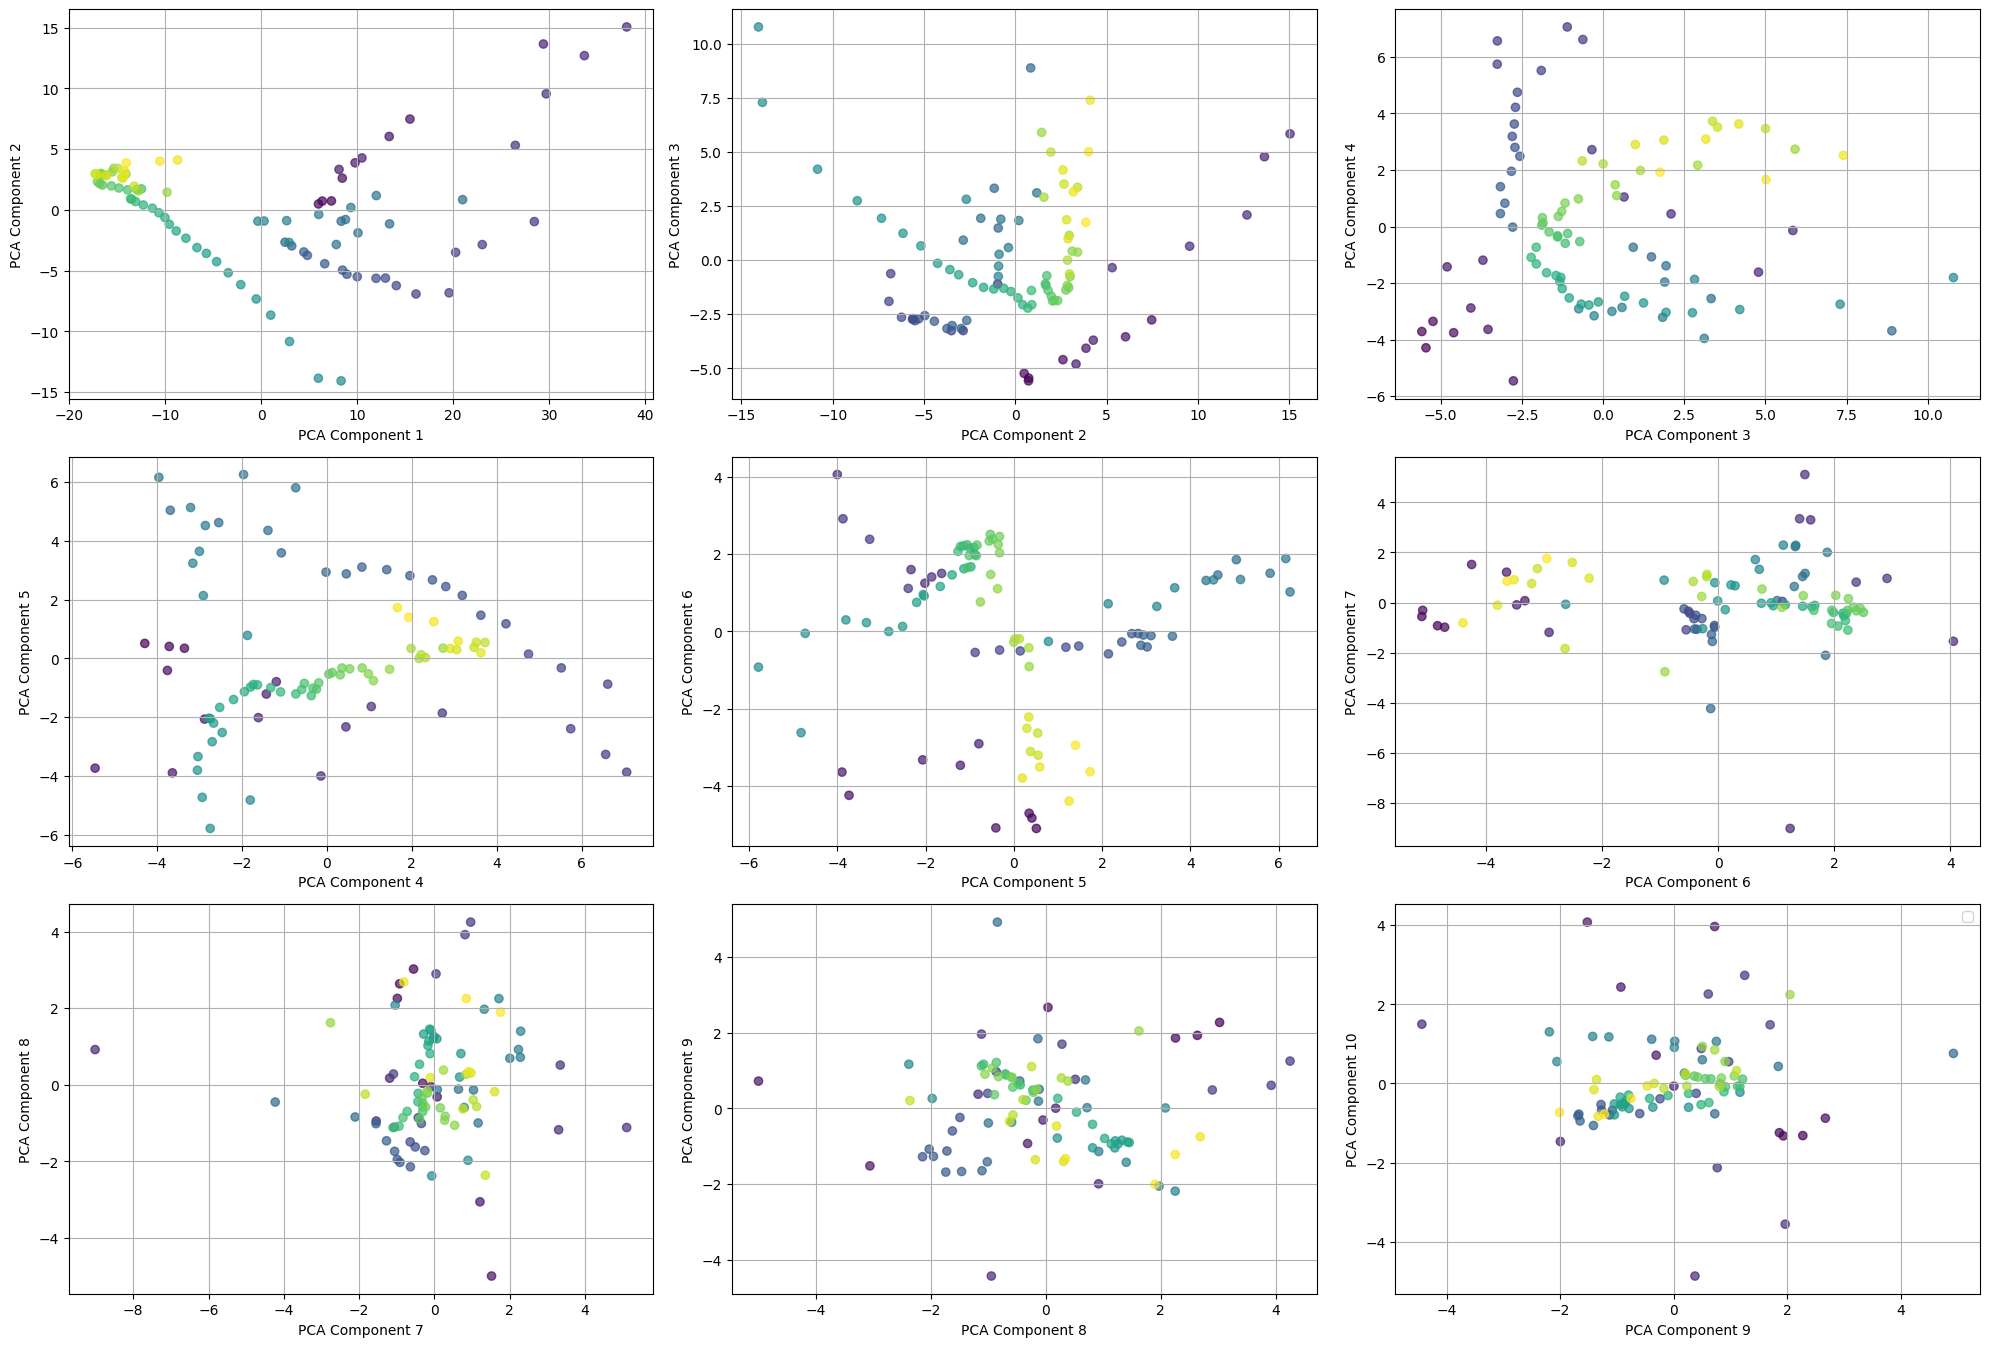

In [13]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [14]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.397
KMeans Davies-Bouldin Index is 1.033


<Axes: xlabel='k'>

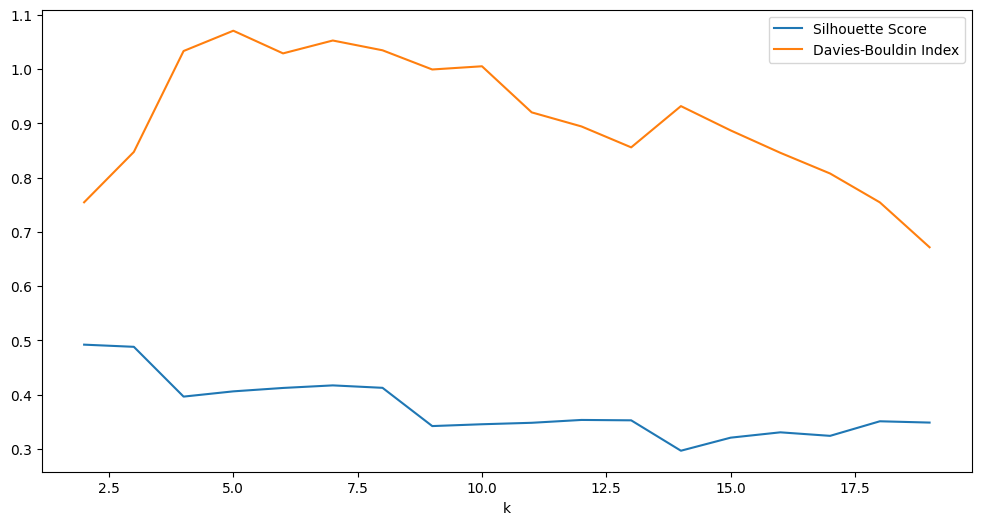

In [15]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         0     92               NaN   
1    0.76            3         0     92               NaN   
2    1.01            3         0     92               NaN   
3    1.27            3         4     78         -0.094004   
4    1.52            3         6     66         -0.169663   
5    1.78            3         4     60         -0.115083   
6    2.03            3         4     57         -0.037786   
7    2.29            3         4     50          0.026512   
8    2.54            3         3     50          0.064414   
9    2.80            3         3     47          0.072221   
10   3.05            3         4     43         -0.094794   
11   3.31            3         6     37         -0.071642   
12   3.56            3         6     35         -0.042078   
13   3.82            3         5     32          0.038553   
14   4.07            3         6     27          0.058318   
15   4.33            3         5     22          0.278828   
16   4.58            3         5     21          0.294137   
17   4.84            3         5     19          0.309453   
18   5.09            3         5     19          0.309453   
19   5.35            3         5     19          0.309453   
20   5.60            3         5     16          0.339364   
21   5.86            3         5     16          0.339364   
22   6.11            3         5     16          0.339364   
23   6.37            3         4     15          0.342864   
24   6.62            3         4     13          0.363224   
25   6.88            3         5      9          0.364860   
26   7.13            3         4      8          0.351150   
27   7.39            3         4      6          0.367458   
28   7.64            3         4      3          0.370980   
29   7.90            3         4      3          0.370980   
30   8.15            3         4      3          0.370980   
31   8.41            3         4      3          0.370980   
32   8.66            3         3      3          0.170621   
33   8.92            3         3      3          0.170621   
34   9.17            3         3      3          0.170621   
35   9.43            3         3      3          0.170621   
36   9.68            3         3      3          0.170621   
37   9.94            3         2      3          0.425701   
38  10.19            3         2      3          0.425701   
39  10.45            3         2      3          0.425701   
40  10.70            3         2      3          0.425701   
41  10.96            3         2      3          0.425701   
42  11.21            3         2      3          0.425701   
43  11.47            3         1      2               NaN   
44  11.72            3         1      2               NaN   
45  11.98            3         1      2               NaN   
46  12.23            3         1      2               NaN   
47  12.49            3         1      2               NaN   
48  12.74            3         1      2               NaN   
49  13.00            3         1      2               NaN   

    Davies-Bouldin Index  
0                    NaN  
1                    NaN  
2                    NaN  
3               1.006857  
4               1.236770  
5               1.733823  
6               1.906400  
7               1.894630  
8               1.972806  
9               1.970470  
10              1.753862  
11              1.620031  
12              1.562405  
13              1.565691  
14              1.716577  
15              2.055326  
16              1.884963  
17              1.753973  
18              1.753973  
19              1.753973  
20              1.417420  
21              1.417420  
22              1.417420  
23              1.348992  
24              1.146322  
25              1.161711  
26              1.096809  
27              1.066494  
28              1.315472  
29              1.315472  
30              1.315472  
31              1.315472  
32 

<Axes: xlabel='eps'>

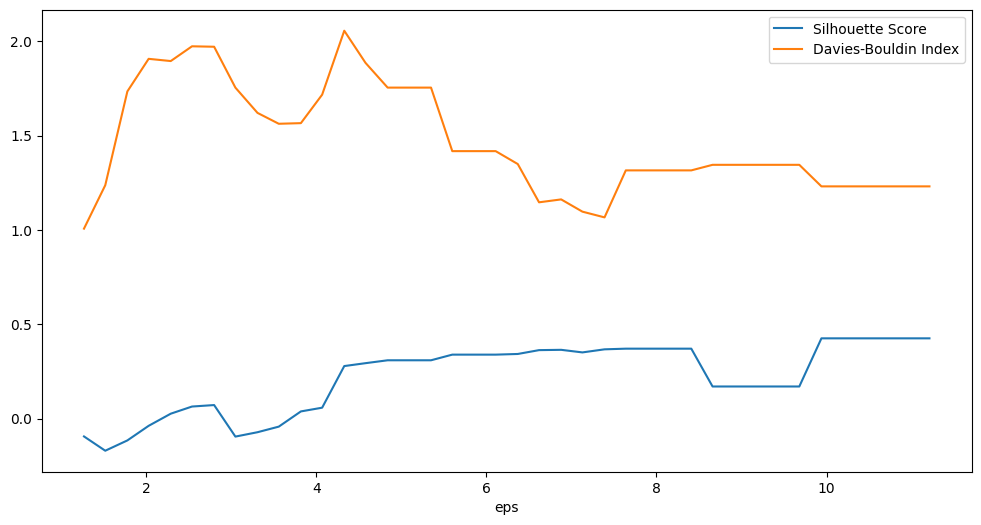

In [16]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

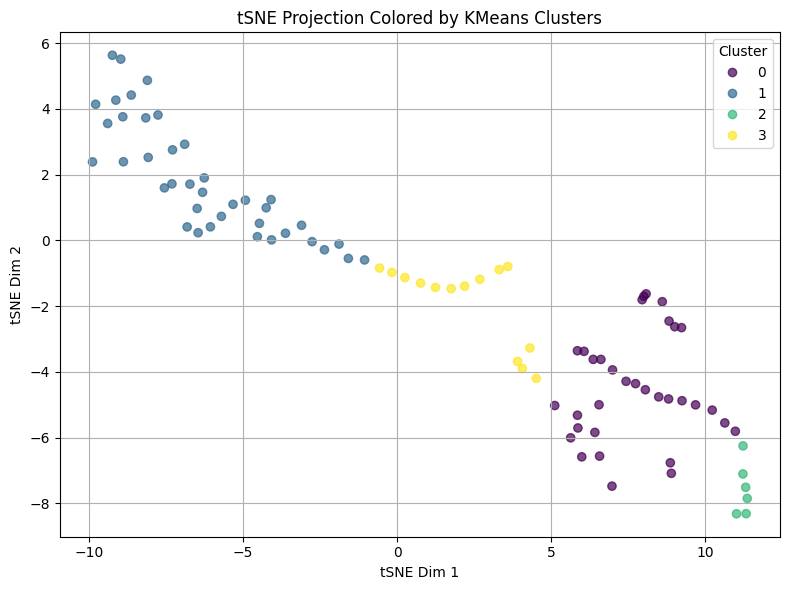

In [17]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.05            2         5    259          0.996086   
1    0.05            2         5    259          0.996086   
2    0.06            2         5    259          0.996086   
3    0.06            2         5    259          0.996086   
4    0.07            2         5    259          0.996086   
..    ...          ...       ...    ...               ...   
195  0.98            2        33     98          0.137953   
196  0.99            2        33     96          0.132407   
197  0.99            2        33     96          0.132407   
198  1.00            2        33     96          0.132407   
199  1.00            2        33     96          0.132407   

     Davies-Bouldin Index  
0                0.006150  
1                0.006150  
2                0.006150  
3                0.006150  
4                0.006150  
..                    ...  
195              0.875146  
196              0.840448  
197              0.840448  
198              0.840448  
199              0.840448  

[200 rows x 6 columns]

<Axes: xlabel='eps'>

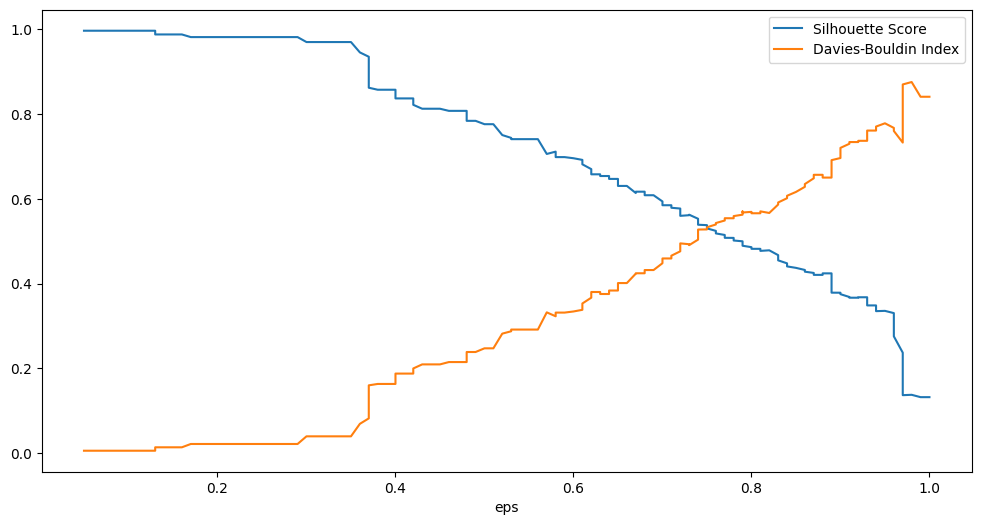

In [18]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 200)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

#### Summer (2)

In [19]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

In [20]:
#Start with spring and work our way down to winter
season = 2
season_year = 2011
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids]
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2011-06-01 to 2011-08-31
Columns: 269 entries, 10000009 to 22000047
dtypes: float64(269)
memory usage: 194.1 KB


None

            10000009   1000228  11000011  11000016  11000272  13000011  \
2011-06-01  0.602706  0.337295  0.490091  0.675585  0.048422  0.329402   
2011-06-02  0.569182  0.315600  0.481203  0.635372  0.046980  0.324139   
2011-06-03  0.557310  0.301049  0.478286  0.603067  0.046041  0.320714   
2011-06-04  0.545007  0.288939  0.466018  0.587792  0.044995  0.316896   
2011-06-05  0.535082  0.281097  0.457007  0.571674  0.044023  0.313350   
...              ...       ...       ...       ...       ...       ...   
2011-08-27  0.646878  1.296705  0.523617  0.755022  0.117000  0.579671   
2011-08-28  0.683660  1.251414  0.529920  0.760359  0.120130  0.591095   
2011-08-29  0.653732  0.751529  0.570636  1.084346  0.122341  0.599161   
2011-08-30  0.698789  1.557418  0.617783  1.387962  0.119127  0.587432   
2011-08-31  0.691036  1.462689  0.643602  1.159778  0.112644  0.563774   

            13000019  13000065  13000116  13000117  ...  66000014  66000034  \
2011-06-01  0.528076  0.622515  

          2011-06-01  2011-06-02  2011-06-03  2011-06-04  2011-06-05  \
10000009    0.266852    0.260040    0.266638    0.257998    0.252905   
1000228    -0.277425   -0.275505   -0.281121   -0.291218   -0.294430   
11000011    0.035914    0.074236    0.097723    0.088581    0.084655   
11000016    0.416305    0.399828    0.364444    0.349762    0.331761   
11000272   -0.869818   -0.842809   -0.826200   -0.814429   -0.805322   
...              ...         ...         ...         ...         ...   
7000003    -0.295755   -0.291313   -0.296415   -0.304081   -0.310420   
8000001    -0.111200   -0.112966   -0.124239   -0.137755   -0.148775   
9000001     0.902965    0.934044    0.943153    0.928160    0.924308   
9000015     0.912147    0.947950    0.959888    0.947957    0.946201   
22000047   -0.322490   -0.291391   -0.280779   -0.265366   -0.270500   

          2011-06-06  2011-06-07  2011-06-08  2011-06-09  2011-06-10  ...  \
10000009    0.246473    0.177899    0.083814    0.006450  

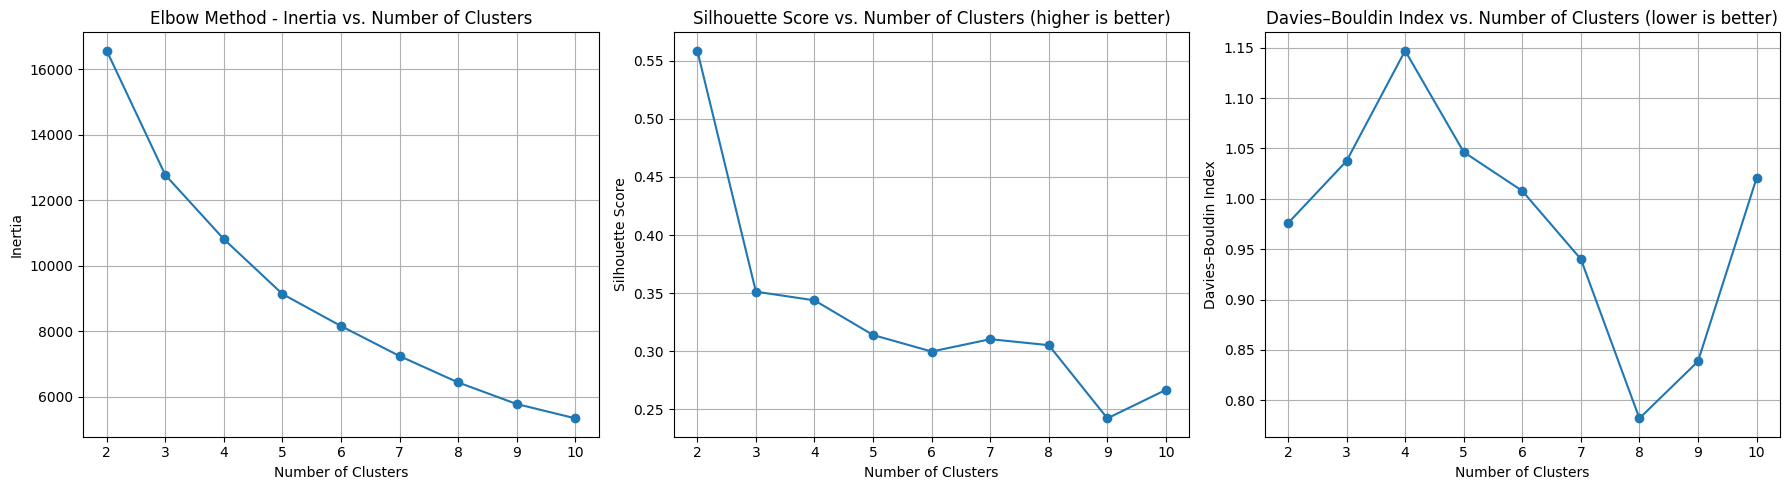

In [21]:
# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        1
1000228         0
11000011        0
11000016        0
11000272        0

            10000009   1000228  11000011  11000016  11000272  13000011  \
2011-06-01  0.602706  0.337295  0.490091  0.675585  0.048422  0.329402   
2011-06-02  0.569182  0.315600  0.481203  0.635372  0.046980  0.324139   
2011-06-03  0.557310  0.301049  0.478286  0.603067  0.046041  0.320714   
2011-06-04  0.545007  0.288939  0.466018  0.587792  0.044995  0.316896   
2011-06-05  0.535082  0.281097  0.457007  0.571674  0.044023  0.313350   
...              ...       ...       ...       ...       ...       ...   
2011-08-27  0.646878  1.296705  0.523617  0.755022  0.117000  0.579671   
2011-08-28  0.683660  1.251414  0.529920  0.760359  0.120130  0.591095   
2011-08-29  0.653732  0.751529  0.570636  1.084346  0.122341  0.599161   
2011-08-30  0.698789  1.557418  0.617783  1.387962  0.119127  0.587432   
2011-08-31  0.691036  1.462689  0.643602  1.159778  0.112644  0.563774   

            13000019  13000065  13000116  13000117  ...  66000014  66000034  \
2011-06-01  0.528076  0.622515  

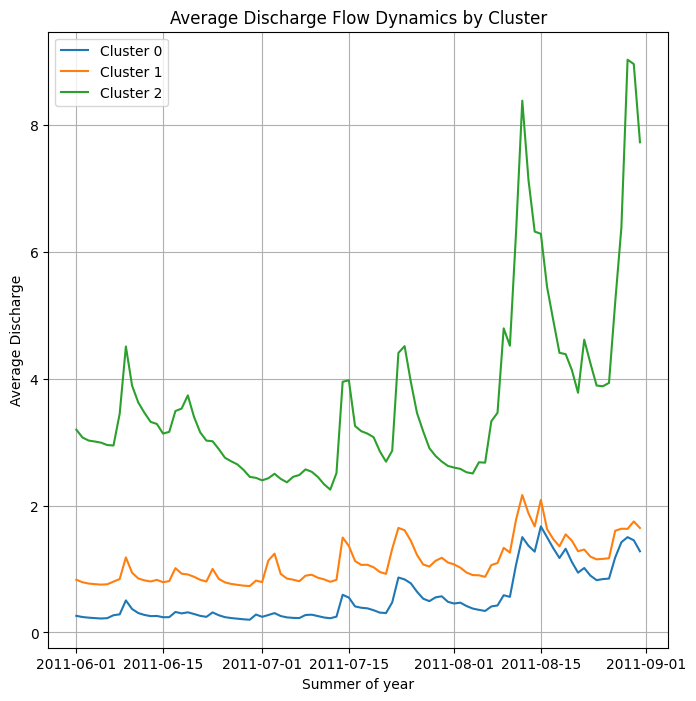

In [22]:
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure(figsize=(8, 8))
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Summer of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)

In [24]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009   1000228  11000011  11000016  11000272  13000011  \
2011-06-01  0.602706  0.337295  0.490091  0.675585  0.048422  0.329402   
2011-06-02  0.569182  0.315600  0.481203  0.635372  0.046980  0.324139   
2011-06-03  0.557310  0.301049  0.478286  0.603067  0.046041  0.320714   
2011-06-04  0.545007  0.288939  0.466018  0.587792  0.044995  0.316896   
2011-06-05  0.535082  0.281097  0.457007  0.571674  0.044023  0.313350   
...              ...       ...       ...       ...       ...       ...   
2011-08-27  0.646878  1.296705  0.523617  0.755022  0.117000  0.579671   
2011-08-28  0.683660  1.251414  0.529920  0.760359  0.120130  0.591095   
2011-08-29  0.653732  0.751529  0.570636  1.084346  0.122341  0.599161   
2011-08-30  0.698789  1.557418  0.617783  1.387962  0.119127  0.587432   
2011-08-31  0.691036  1.462689  0.643602  1.159778  0.112644  0.563774   

            13000019  13000065  13000116  13000117  ...  66000014  66000034  \
2011-06-01  0.528076  0.622515  0.805175  0.432326  ...  0.149043  0.872310   
2011-06-02  0.508836  0.604860  0.737788  0.430577  ...  0.125555  0.545807   
2011-06-03  0.480619  0.578967  0.634441  0.430309  ...  0.121200  0.508270   
2011-06-04  0.471953  0.571016  0.626807  0.430782  ...  0.115001  0.494432   
2011-06-05  0.470461  0.569646  0.548980  0.429577  ...  0.107706  0.482416   
...              ...       ...       ...       ...  ...       ...       ...   
2011-08-27  0.582449  0.672409  0.480754  0.457497  ...  1.915462  1.915134   
2011-08-28  0.585999  0.675667  0.578859  0.462305  ...  1.739546  1.962993   
2011-08-29  0.554160  0.646450  0.686862  0.504230  ...  1.593473  1.949941   
2011-08-30  0.598734  0.687352  0.684267  0.567288  ...  1.754168  3.204563   
2011-08-31  0.556620  0.648707  0.605451  0.516494  ...  1.661342  3.741769   

            67000017  67000018  67000019   7000003   8000001   9000001  \
2011-06-01  0.275825  0.299426  0.263399  0.328357  0.418353  0.912899   
2011-06-02  0.159911  0.136082  0.168099  0.308115  0.392563  0.888325   
2011-06-03  0.124076  0.113958  0.137114  0.293894  0.374444  0.873808   
2011-06-04  0.103138  0.106029  0.116243  0.282942  0.360490  0.857466   
2011-06-05  0.094291  0.099209  0.104116  0.273677  0.348687  0.846639   
...              ...       ...       ...       ...       ...       ...   
2011-08-27  1.384983  0.702384  1.170719  0.493421  0.678044  0.775740   
2011-08-28  1.292396  0.718823  1.177514  0.662331  0.766305  0.749103   
2011-08-29  1.117142  0.714343  1.039311  1.065316  0.780450  0.852172   
2011-08-30  1.145522  1.164972  1.217266  1.493389  0.912402  0.903379   
2011-08-31  1.597980  1.365345  1.588846  1.270074  1.015440  0.750008   

             9000015  22000047  
2011-06-01  0.917376  0.315320  
2011-06-02  0.894909  0.308078  
2011-06-03  0.881638  0.301209  
2011-06-04  0.866696  0.300992  
2011-06-05  0.856798  0.292202  
...              ...       ...  
2011-08-27  0.791978  0.401421  
2011-08-28  0.767625  0.425376  
2011-08-29  0.861857  0.479362  
2011-08-30  0.908672  0.460208  
2011-08-31  0.768452  0.449404  

[92 rows x 269 columns]

<Axes: >

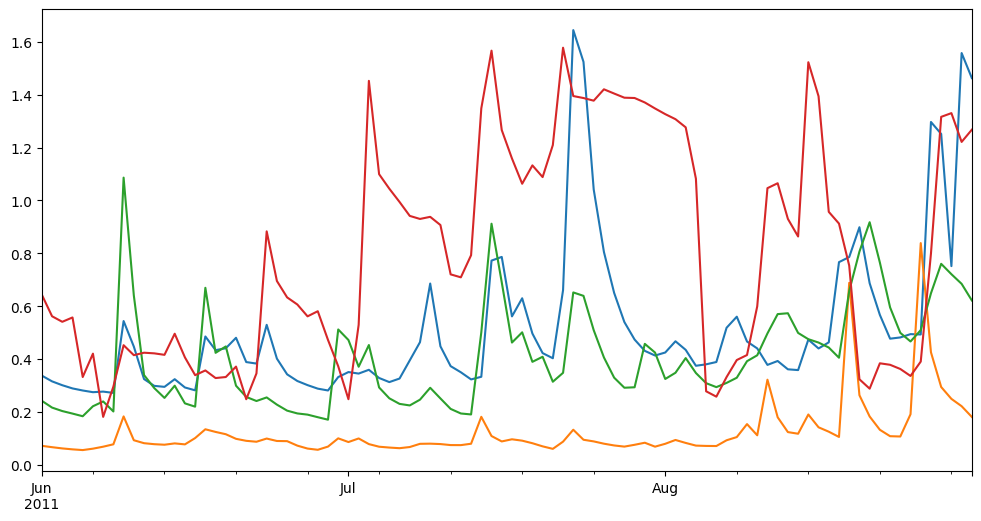

In [25]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

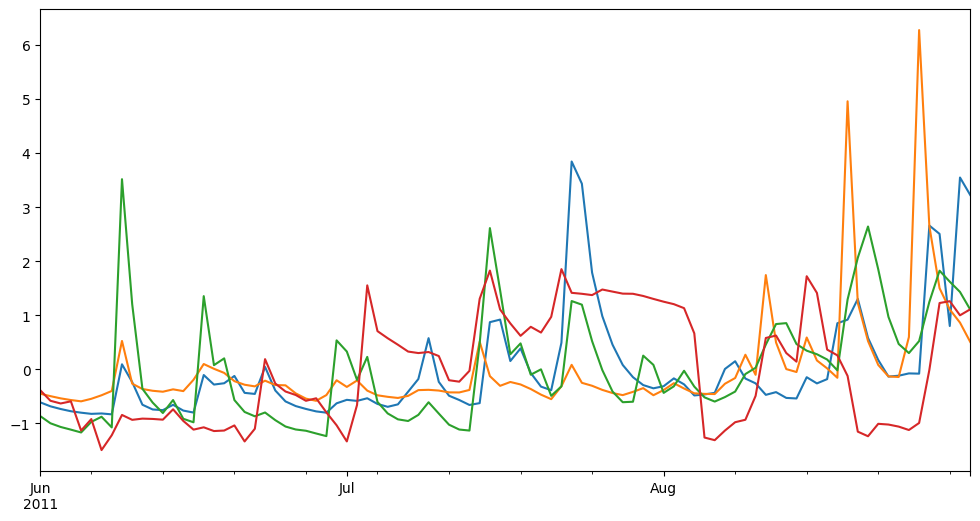

In [26]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

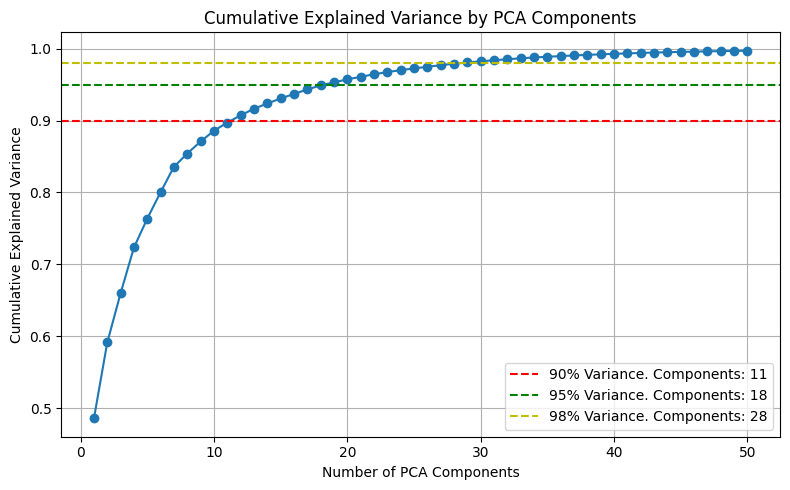

In [27]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [28]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[-7.44712945e+00,  1.06550728e+00,  2.07722845e+00, ...,
        -8.04114459e-01, -1.19253090e+00,  6.89636885e-01],
       [-8.79929050e+00, -2.32334271e-01,  1.98183245e+00, ...,
        -9.68348891e-01, -6.64194124e-01,  7.01247298e-01],
       [-9.52212599e+00, -9.87645026e-01,  1.76393363e+00, ...,
        -1.16615738e+00, -1.42719659e-01,  1.04859298e+00],
       ...,
       [ 3.00466731e+01,  6.31451861e-01,  1.47878336e+01, ...,
         5.01372758e+00, -1.97385654e+00,  1.96307312e+00],
       [ 3.36809562e+01,  4.58009867e+00,  1.53438086e+01, ...,
        -1.73619631e+00, -4.16203577e-01, -3.01791993e-02],
       [ 2.89064086e+01,  1.96489914e+00,  1.45148489e+01, ...,
        -3.35036275e+00,  1.26771410e+00, -9.52390704e-01]],
      shape=(92, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_3456\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


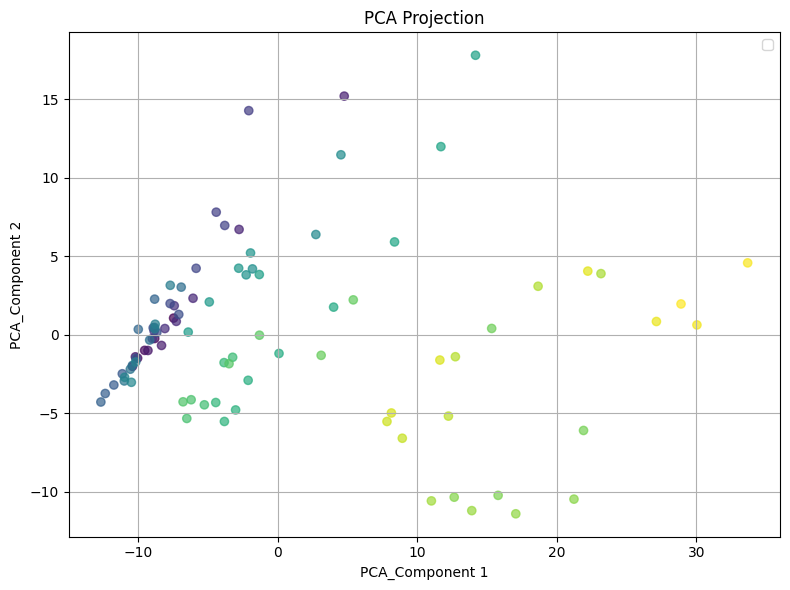

In [29]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_3456\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


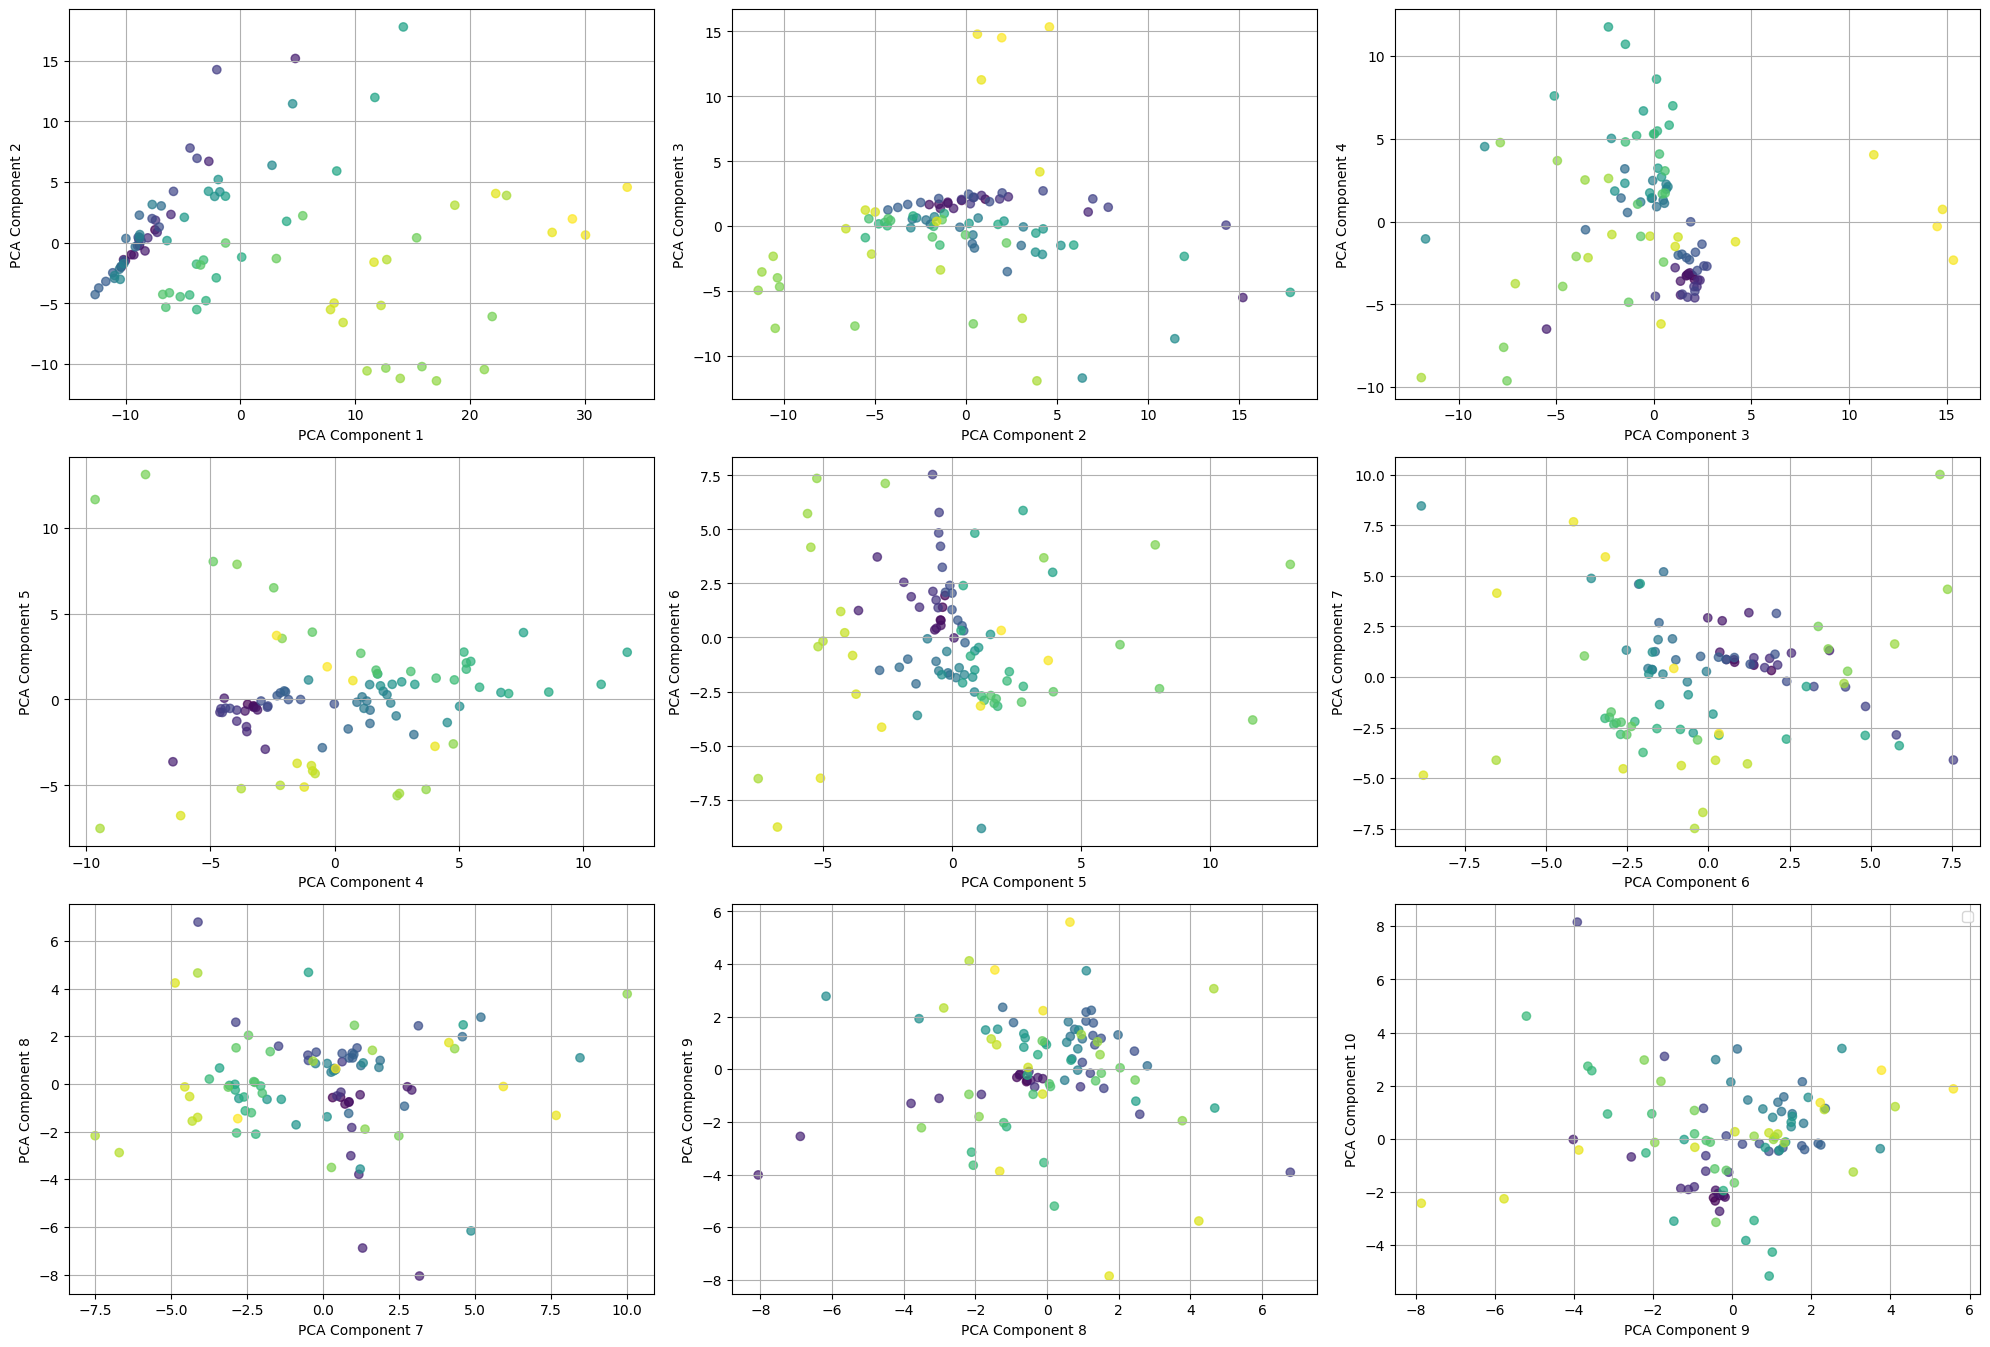

In [30]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [31]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.323
KMeans Davies-Bouldin Index is 1.362


<Axes: xlabel='k'>

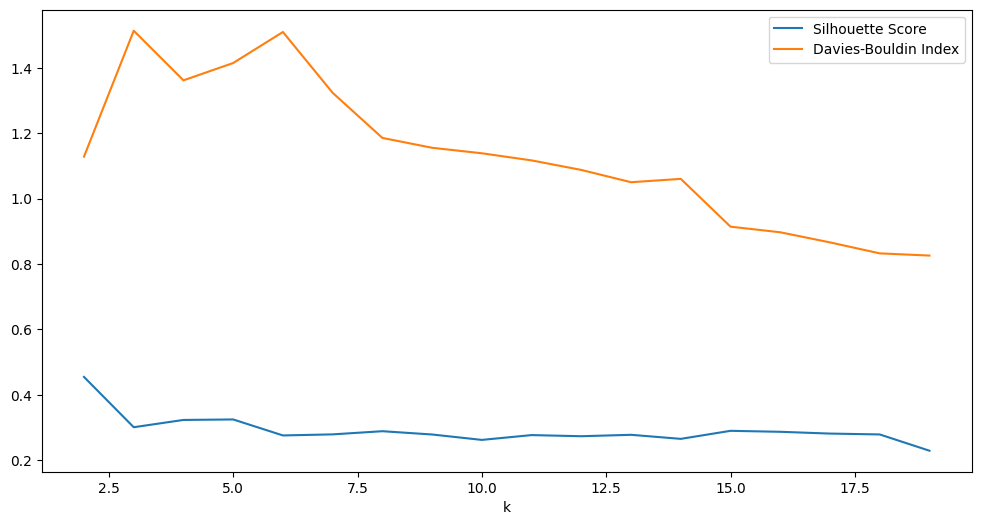

In [32]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         0     92               NaN   
1    0.76            3         0     92               NaN   
2    1.01            3         1     89               NaN   
3    1.27            3         2     86         -0.178939   
4    1.52            3         2     85         -0.162101   
5    1.78            3         2     84         -0.153738   
6    2.03            3         3     80         -0.142660   
7    2.29            3         3     78         -0.127348   
8    2.54            3         4     72         -0.094682   
9    2.80            3         5     67         -0.062458   
10   3.05            3         5     63         -0.037706   
11   3.31            3         6     57         -0.063870   
12   3.56            3         7     51         -0.030952   
13   3.82            3         6     51         -0.047339   
14   4.07            3         6     49         -0.028811   
15   4.33            3         5     46          0.015436   
16   4.58            3         5     43          0.022039   
17   4.84            3         5     43          0.022039   
18   5.09            3         7     36          0.079462   
19   5.35            3         7     33          0.103277   
20   5.60            3         7     33          0.103277   
21   5.86            3         6     29          0.106937   
22   6.11            3         6     27          0.116417   
23   6.37            3         6     27          0.116417   
24   6.62            3         6     24          0.155504   
25   6.88            3         6     24          0.155504   
26   7.13            3         5     24          0.156940   
27   7.39            3         3     24          0.304655   
28   7.64            3         3     23          0.310206   
29   7.90            3         3     20          0.302471   
30   8.15            3         3     20          0.302471   
31   8.41            3         3     19          0.294573   
32   8.66            3         3     19          0.294573   
33   8.92            3         3     19          0.294573   
34   9.17            3         3     19          0.294573   
35   9.43            3         3     18          0.321786   
36   9.68            3         3     18          0.321786   
37   9.94            3         3     18          0.321786   
38  10.19            3         3     18          0.321786   
39  10.45            3         3     17          0.329577   
40  10.70            3         3     17          0.329577   
41  10.96            3         3     16          0.338825   
42  11.21            3         2     16          0.375621   
43  11.47            3         3     12          0.385108   
44  11.72            3         3     12          0.385108   
45  11.98            3         3     11          0.377452   
46  12.23            3         3     11          0.377452   
47  12.49            3         3     11          0.377452   
48  12.74            3         3     11          0.377452   
49  13.00            3         3     11          0.377452   

    Davies-Bouldin Index  
0                    NaN  
1                    NaN  
2                    NaN  
3               1.200370  
4               1.188899  
5               1.223812  
6               1.205514  
7               1.244047  
8               1.281973  
9               1.282070  
10              1.274037  
11              1.410432  
12              1.492263  
13              1.573961  
14              1.566535  
15              1.560724  
16              1.591895  
17              1.591895  
18              1.509585  
19              1.538045  
20              1.538045  
21              1.484981  
22              1.462129  
23              1.462129  
24              1.481874  
25              1.481874  
26              1.663357  
27              1.595737  
28              1.570427  
29              1.553858  
30              1.553858  
31              1.565926  
32 

<Axes: xlabel='eps'>

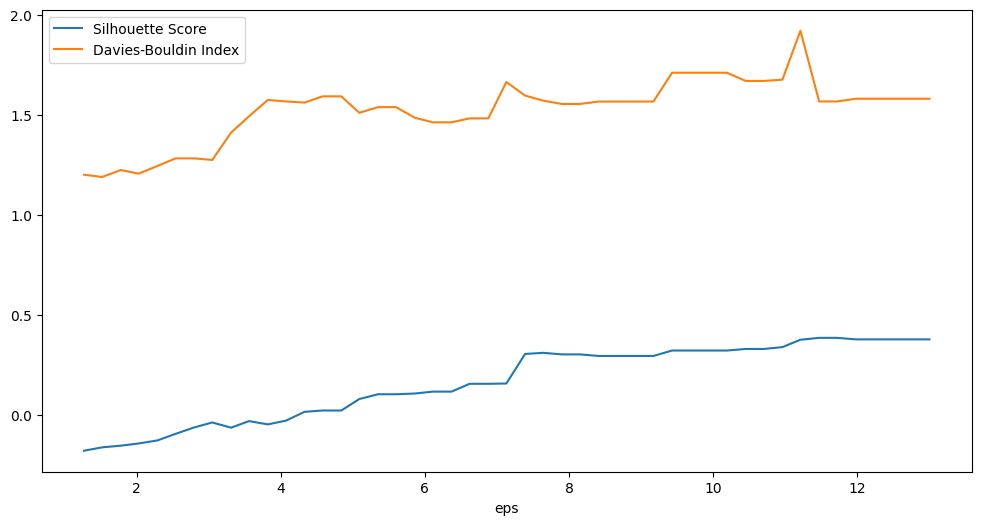

In [33]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

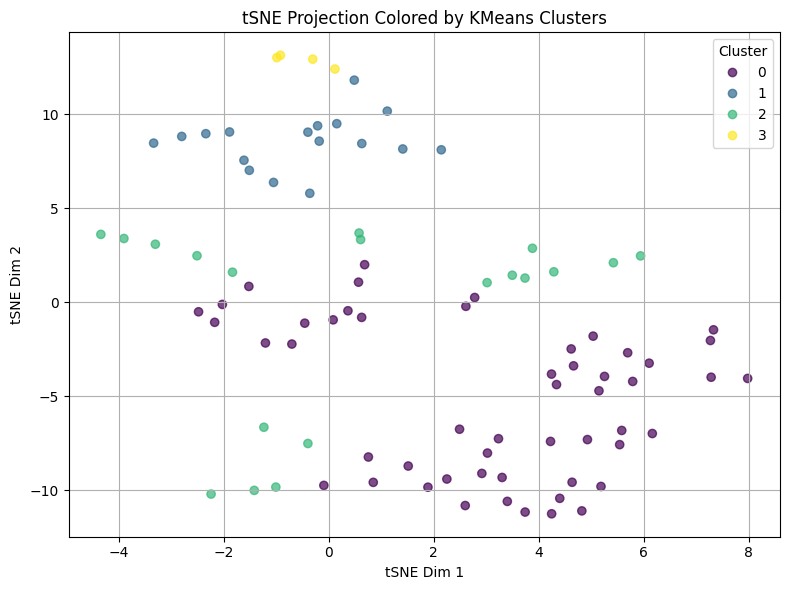

In [34]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.05            2         6    257          0.997475   
1    0.05            2         6    257          0.997475   
2    0.06            2         6    257          0.997475   
3    0.06            2         6    257          0.997475   
4    0.07            2         7    255          0.994523   
..    ...          ...       ...    ...               ...   
195  0.98            2        20    116         -0.213825   
196  0.99            2        19    115         -0.200078   
197  0.99            2        19    115         -0.200078   
198  1.00            2        19    115         -0.200078   
199  1.00            2        19    113         -0.205003   

     Davies-Bouldin Index  
0                0.004063  
1                0.004063  
2                0.004063  
3                0.004063  
4                0.009296  
..                    ...  
195              1.007568  
196              0.961708  
197              0.961708  
198              0.961708  
199              0.977777  

[200 rows x 6 columns]

<Axes: xlabel='eps'>

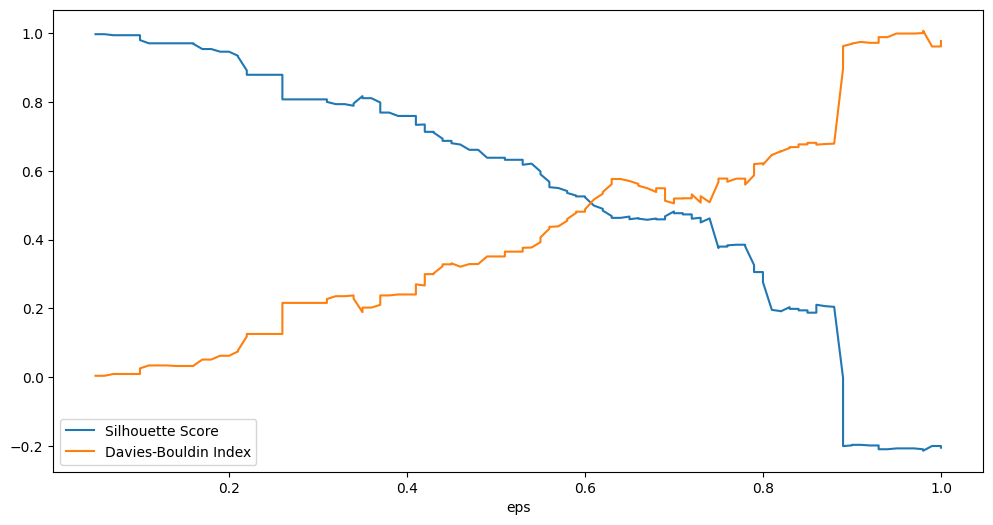

In [35]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 200)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

#### Fall (3)

In [36]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

In [37]:
#Start with spring and work our way down to winter
season = 3
season_year = 2011
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids]
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 91 entries, 2011-09-01 to 2011-11-30
Columns: 275 entries, 10000009 to 22000047
dtypes: float64(275)
memory usage: 196.2 KB


None

            10000009   1000228  11000011  11000016  11000272  13000011  \
2011-09-01  0.643934  1.006723  0.649090  0.985376  0.106323  0.540707   
2011-09-02  0.621793  0.797539  0.640737  0.914681  0.101174  0.521917   
2011-09-03  0.611466  0.624200  0.626682  0.870876  0.097620  0.508946   
2011-09-04  0.601927  0.549113  0.621731  0.935636  0.094864  0.498886   
2011-09-05  0.614145  1.141799  0.620218  1.015557  0.118030  0.583428   
...              ...       ...       ...       ...       ...       ...   
2011-11-26  0.821020  0.768831  0.748980  0.996821  0.105428  0.537440   
2011-11-27  0.923157  0.867150  0.762710  1.226139  0.118437  0.584915   
2011-11-28  0.994307  0.942484  0.827170  1.168446  0.118674  0.585779   
2011-11-29  0.878327  0.634033  0.831258  1.051486  0.117533  0.581615   
2011-11-30  0.848026  0.652281  0.873246  1.140847  0.116154  0.576585   

            13000019  13000065  13000116  13000117  ...  66000014  66000034  \
2011-09-01  0.528201  0.622630  

          2011-09-01  2011-09-02  2011-09-03  2011-09-04  2011-09-05  \
10000009   -0.574376   -0.553687   -0.514703   -0.499811   -0.595172   
1000228    -0.259490   -0.369553   -0.499007   -0.574610    0.080454   
11000011   -0.569901   -0.533839   -0.495947   -0.471762   -0.587396   
11000016   -0.278018   -0.246820   -0.194952   -0.027184   -0.081190   
11000272   -1.041002   -1.099156   -1.148073   -1.217956   -1.230415   
...              ...         ...         ...         ...         ...   
7000003    -0.477894   -0.522338   -0.668085   -0.319523   -0.596978   
8000001    -0.275599   -0.103097    0.066167    0.050128   -0.009782   
9000001    -0.482258   -0.465590   -0.507179   -0.451513   -0.478892   
9000015    -0.466253   -0.442300   -0.470447   -0.411548   -0.450328   
22000047   -0.759550   -0.774023   -0.780561   -0.787989   -0.886909   

          2011-09-06  2011-09-07  2011-09-08  2011-09-09  2011-09-10  ...  \
10000009   -0.519261   -0.476217   -0.358100   -0.207665  

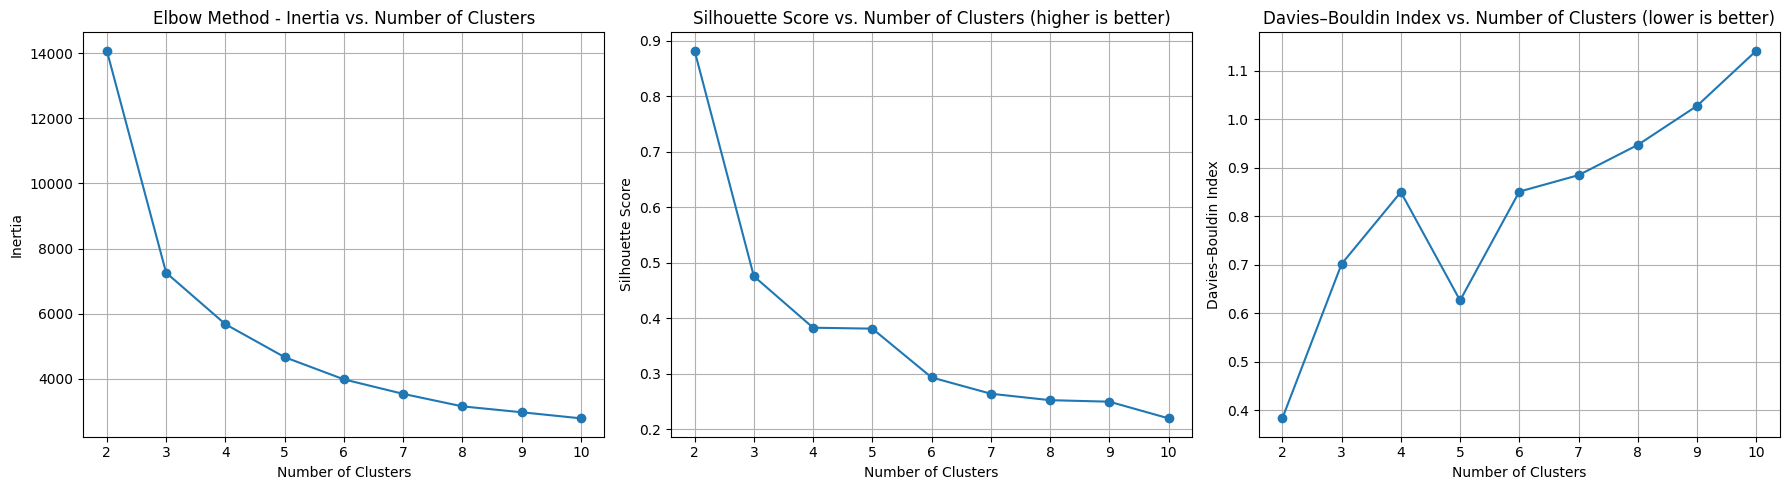

In [38]:
# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        0
1000228         0
11000011        2
11000016        2
11000272        0

            10000009   1000228  11000011  11000016  11000272  13000011  \
2011-09-01  0.643934  1.006723  0.649090  0.985376  0.106323  0.540707   
2011-09-02  0.621793  0.797539  0.640737  0.914681  0.101174  0.521917   
2011-09-03  0.611466  0.624200  0.626682  0.870876  0.097620  0.508946   
2011-09-04  0.601927  0.549113  0.621731  0.935636  0.094864  0.498886   
2011-09-05  0.614145  1.141799  0.620218  1.015557  0.118030  0.583428   
...              ...       ...       ...       ...       ...       ...   
2011-11-26  0.821020  0.768831  0.748980  0.996821  0.105428  0.537440   
2011-11-27  0.923157  0.867150  0.762710  1.226139  0.118437  0.584915   
2011-11-28  0.994307  0.942484  0.827170  1.168446  0.118674  0.585779   
2011-11-29  0.878327  0.634033  0.831258  1.051486  0.117533  0.581615   
2011-11-30  0.848026  0.652281  0.873246  1.140847  0.116154  0.576585   

            13000019  13000065  13000116  13000117  ...  66000014  66000034  \
2011-09-01  0.528201  0.622630  

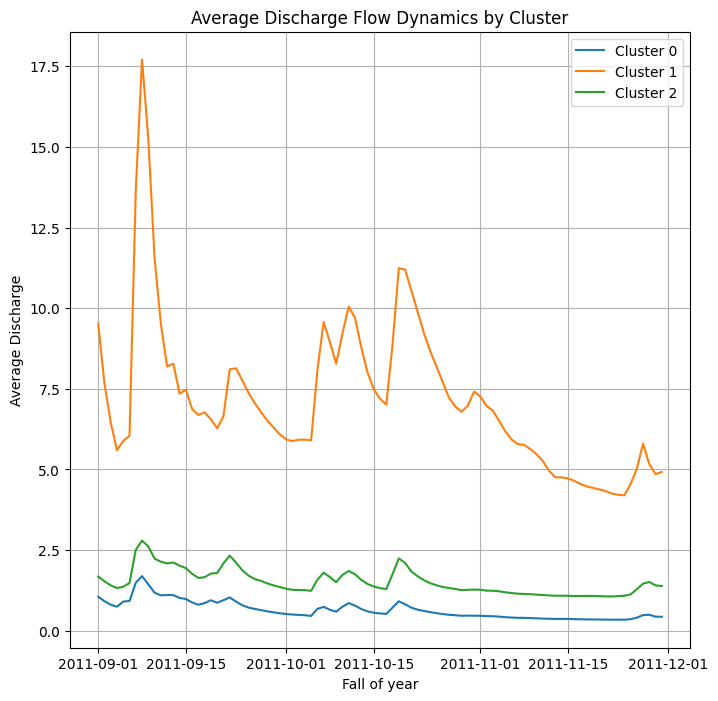

In [39]:
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure(figsize=(8, 8))
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Fall of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)

In [41]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009   1000228  11000011  11000016  11000272  13000011  \
2011-09-01  0.643934  1.006723  0.649090  0.985376  0.106323  0.540707   
2011-09-02  0.621793  0.797539  0.640737  0.914681  0.101174  0.521917   
2011-09-03  0.611466  0.624200  0.626682  0.870876  0.097620  0.508946   
2011-09-04  0.601927  0.549113  0.621731  0.935636  0.094864  0.498886   
2011-09-05  0.614145  1.141799  0.620218  1.015557  0.118030  0.583428   
...              ...       ...       ...       ...       ...       ...   
2011-11-26  0.821020  0.768831  0.748980  0.996821  0.105428  0.537440   
2011-11-27  0.923157  0.867150  0.762710  1.226139  0.118437  0.584915   
2011-11-28  0.994307  0.942484  0.827170  1.168446  0.118674  0.585779   
2011-11-29  0.878327  0.634033  0.831258  1.051486  0.117533  0.581615   
2011-11-30  0.848026  0.652281  0.873246  1.140847  0.116154  0.576585   

            13000019  13000065  13000116  13000117  ...  66000014  66000034  \
2011-09-01  0.528201  0.622630  0.556718  0.453058  ...  1.456657  3.476646   
2011-09-02  0.514501  0.610058  0.493723  0.429538  ...  1.228990  2.788779   
2011-09-03  0.509649  0.605606  0.453564  0.411776  ...  1.060479  2.335111   
2011-09-04  0.514334  0.609905  0.439218  0.400225  ...  0.921171  1.977735   
2011-09-05  0.552614  0.645032  0.473007  0.403202  ...  0.949509  1.850891   
...              ...       ...       ...       ...  ...       ...       ...   
2011-11-26  0.737463  0.814653  1.384038  0.483277  ...  0.194114  0.617678   
2011-11-27  0.950299  1.009956  2.496983  0.550650  ...  0.247528  0.665084   
2011-11-28  1.093559  1.141414  1.268951  0.577387  ...  0.197086  0.680610   
2011-11-29  0.818654  0.889156  1.394478  0.572150  ...  0.187287  0.643274   
2011-11-30  0.772462  0.846768  1.449236  0.592175  ...  0.192093  0.639114   

            67000017  67000018  67000019   7000003   8000001   9000001  \
2011-09-01  1.774996  1.252932  1.606391  0.755094  0.988163  0.750067   
2011-09-02  1.296065  1.003087  1.320215  0.651715  1.051856  0.705878   
2011-09-03  1.042972  0.846711  1.235967  0.487029  1.082718  0.617570   
2011-09-04  0.898701  0.723887  1.157182  0.729223  0.990223  0.636029   
2011-09-05  0.820040  0.680314  1.151500  0.612734  1.071326  0.704958   
...              ...       ...       ...       ...       ...       ...   
2011-11-26  0.171364  0.179157  0.300218  1.045411  0.833924  1.133600   
2011-11-27  0.196281  0.208609  0.346051  1.542777  1.191276  1.282144   
2011-11-28  0.214160  0.218239  0.348325  1.507124  1.316517  1.425328   
2011-11-29  0.205321  0.194924  0.318476  1.243472  1.117261  1.694647   
2011-11-30  0.192026  0.192353  0.313865  1.073141  1.029160  1.865892   

             9000015  22000047  
2011-09-01  0.768506  0.430591  
2011-09-02  0.728106  0.411496  
2011-09-03  0.647370  0.395779  
2011-09-04  0.664247  0.398452  
2011-09-05  0.727266  0.386302  
...              ...       ...  
2011-11-26  1.119153  0.584912  
2011-11-27  1.254960  0.595206  
2011-11-28  1.385866  0.547235  
2011-11-29  1.632092  0.570359  
2011-11-30  1.788654  0.611838  

[91 rows x 275 columns]

<Axes: >

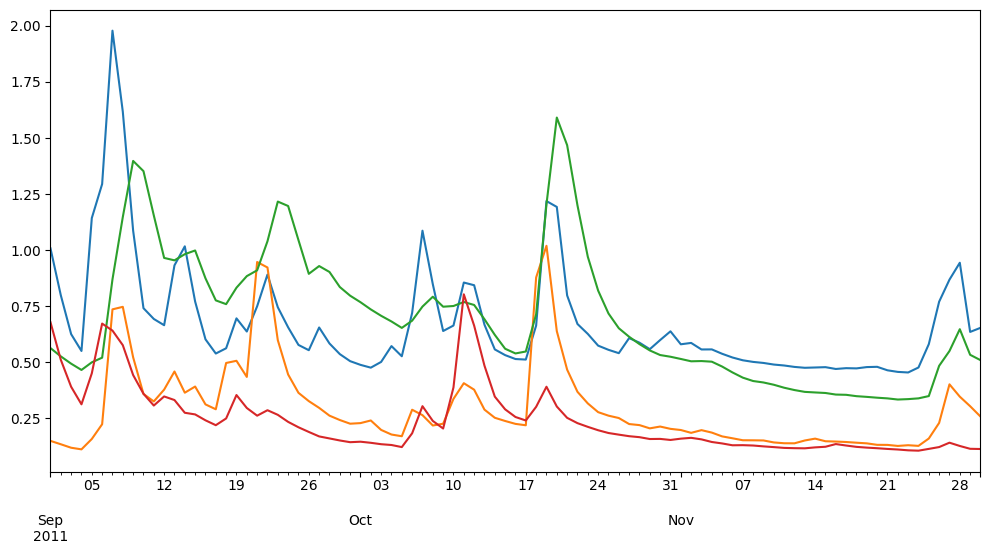

In [42]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

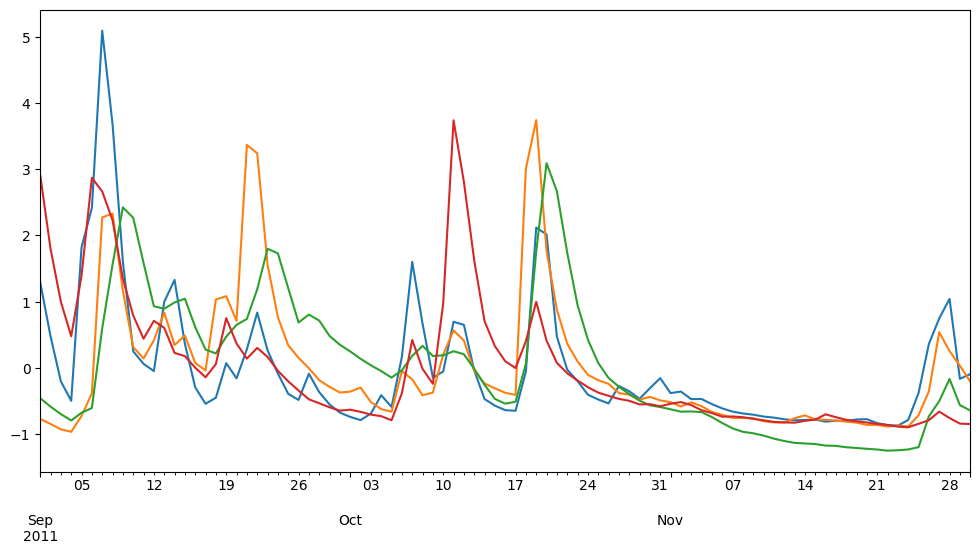

In [43]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

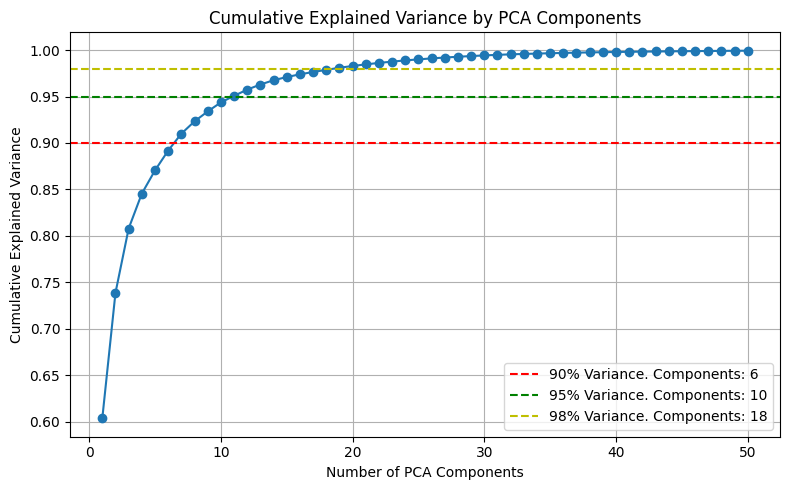

In [44]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [45]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[ 1.16580066e+01,  2.12257491e+01,  1.10539492e+00, ...,
        -6.81925104e-01,  9.32599125e-01,  1.24025131e+00],
       [ 5.94098753e+00,  1.90951981e+01,  1.55226020e-01, ...,
        -3.00558984e-01, -1.60708262e-01,  1.74388803e-02],
       [ 1.69453152e+00,  1.71735201e+01, -3.77045974e-01, ...,
        -4.20477413e-01, -8.93326342e-01, -1.06315730e+00],
       ...,
       [-6.11583904e+00, -5.06090322e+00,  5.83624336e+00, ...,
         2.47808558e+00, -1.51295231e+00,  1.42090038e+00],
       [-9.44019364e+00, -3.88195954e+00,  4.56695894e+00, ...,
        -7.29819796e-01,  1.75573142e-01, -1.43167944e+00],
       [-9.59906094e+00, -3.56367636e+00,  4.83502665e+00, ...,
        -8.06169385e-01, -4.85103036e-02, -1.24915910e+00]],
      shape=(91, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_3456\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


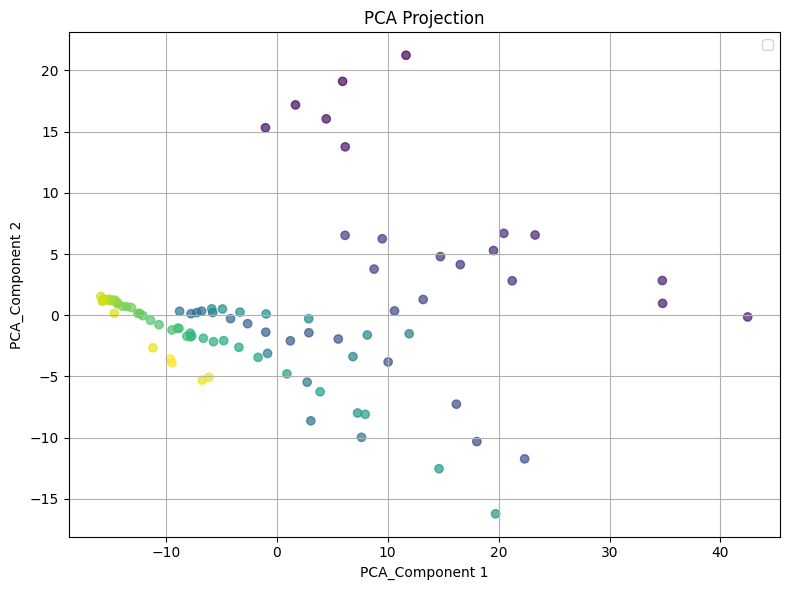

In [46]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_3456\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


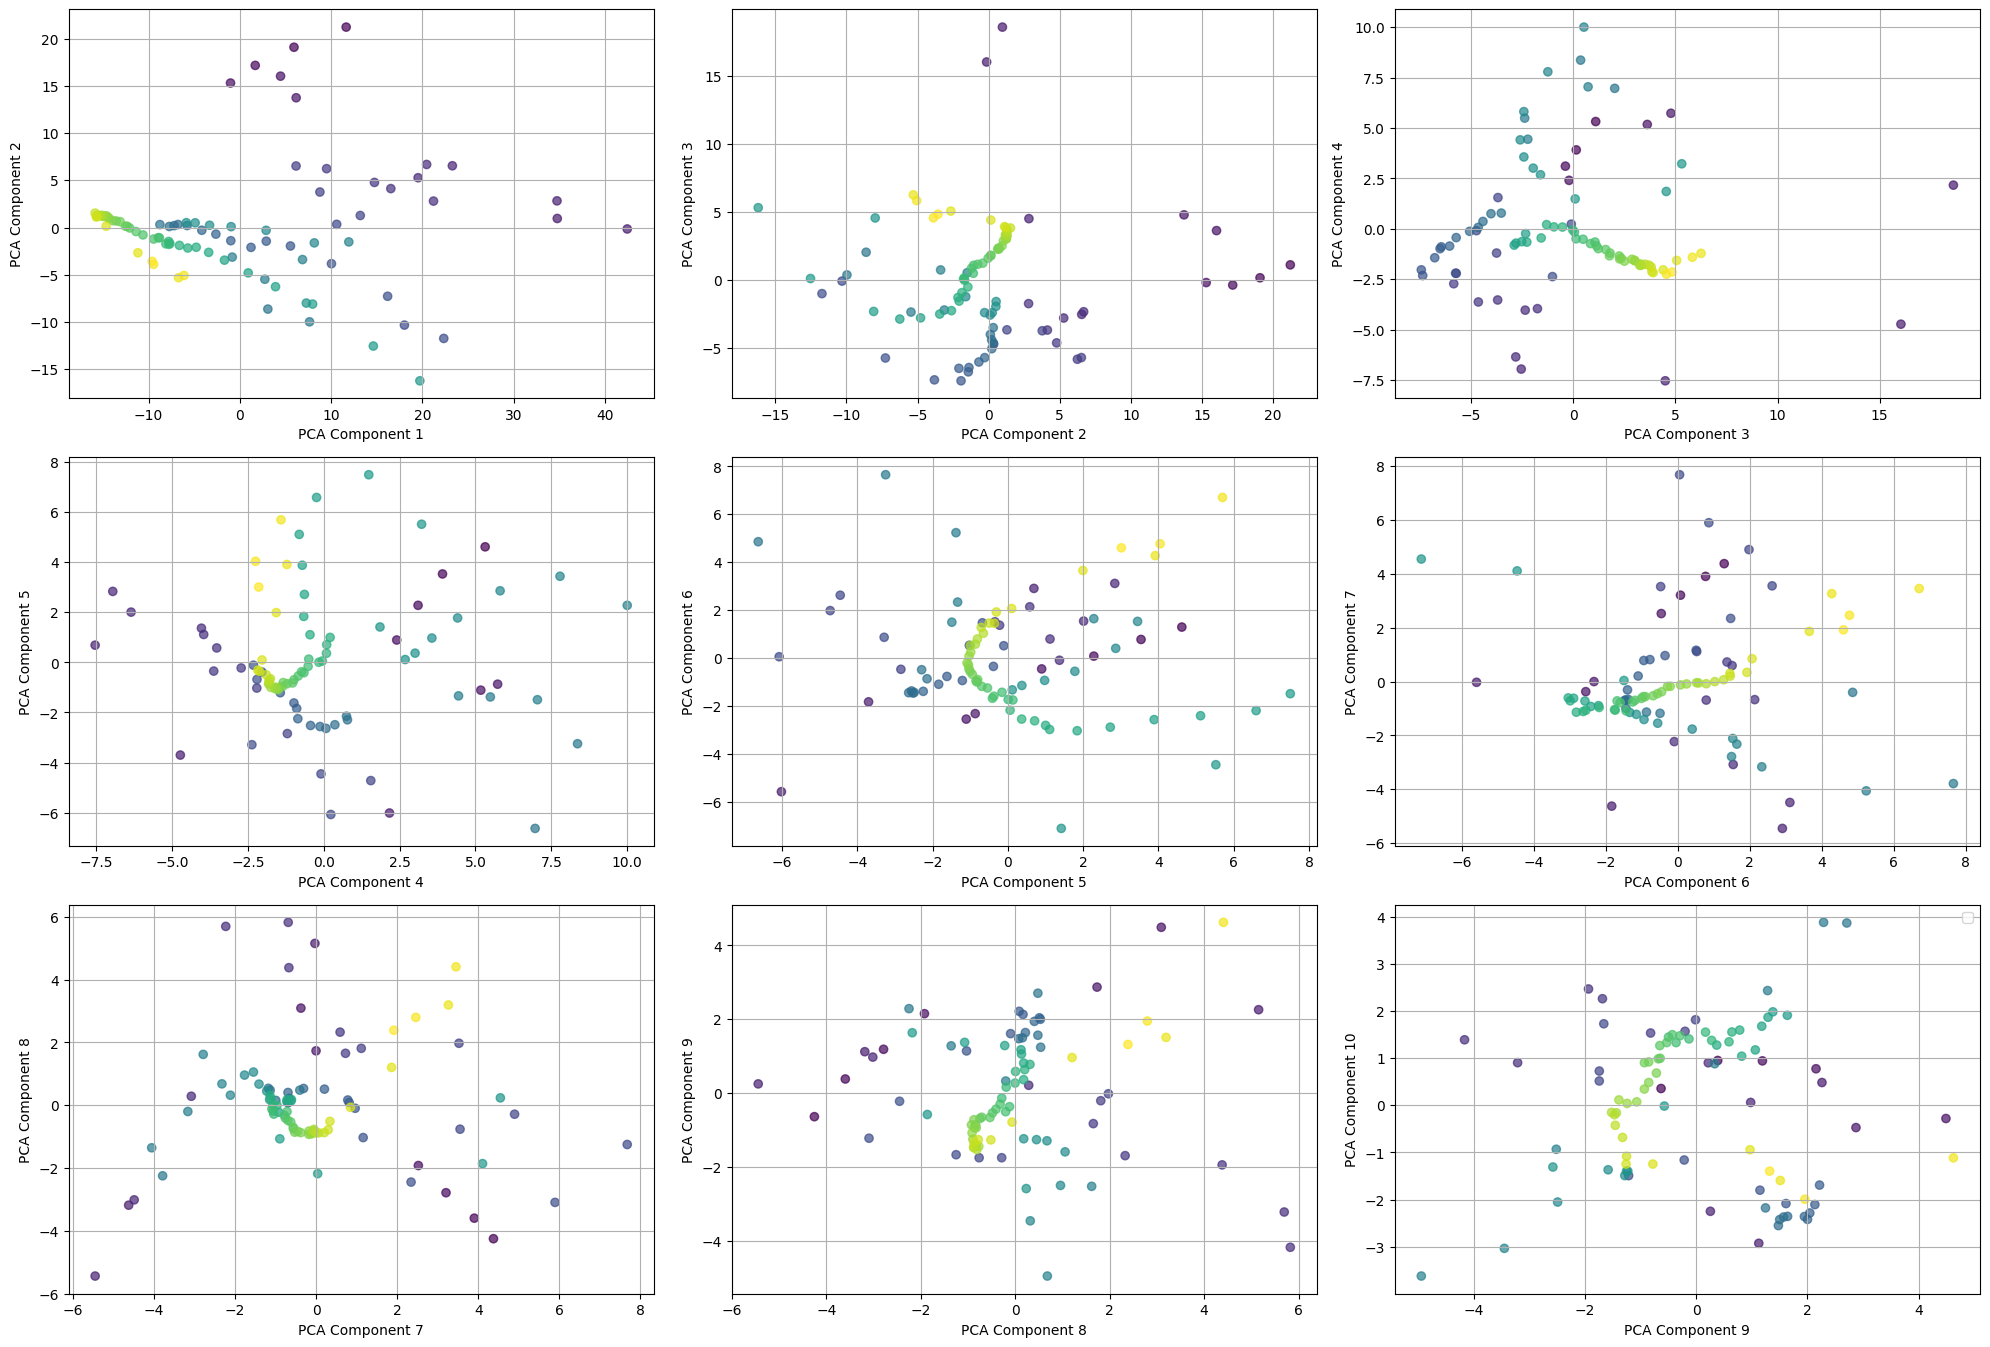

In [47]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [48]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.292
KMeans Davies-Bouldin Index is 1.228


<Axes: xlabel='k'>

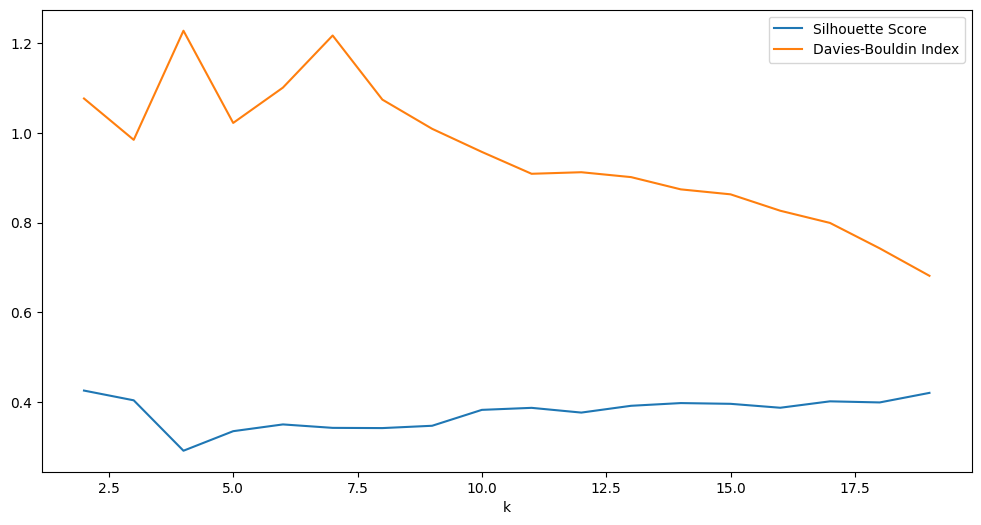

In [49]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         0     91               NaN   
1    0.76            3         2     80         -0.063761   
2    1.01            3         2     73         -0.018955   
3    1.27            3         5     60          0.029536   
4    1.52            3         2     60          0.067764   
5    1.78            3         2     57          0.090516   
6    2.03            3         2     57          0.090516   
7    2.29            3         3     49          0.122465   
8    2.54            3         3     48          0.120402   
9    2.80            3         3     45          0.112520   
10   3.05            3         3     44          0.137923   
11   3.31            3         3     44          0.137923   
12   3.56            3         3     42          0.125824   
13   3.82            3         4     39          0.133581   
14   4.07            3         4     38          0.121319   
15   4.33            3         4     38          0.121319   
16   4.58            3         4     38          0.121319   
17   4.84            3         4     37          0.139740   
18   5.09            3         4     37          0.139740   
19   5.35            3         4     36          0.130758   
20   5.60            3         4     34          0.141748   
21   5.86            3         5     31          0.161672   
22   6.11            3         5     27          0.146264   
23   6.37            3         3     26          0.271576   
24   6.62            3         3     26          0.271576   
25   6.88            3         3     26          0.271576   
26   7.13            3         3     26          0.271576   
27   7.39            3         3     21          0.320326   
28   7.64            3         3     19          0.328968   
29   7.90            3         3     18          0.337299   
30   8.15            3         3     17          0.327756   
31   8.41            3         3     17          0.327756   
32   8.66            3         3     17          0.327756   
33   8.92            3         3     15          0.335096   
34   9.17            3         3     13          0.330017   
35   9.43            3         3     13          0.330017   
36   9.68            3         3     10          0.349540   
37   9.94            3         3     10          0.349540   
38  10.19            3         3     10          0.349540   
39  10.45            3         2      9          0.314310   
40  10.70            3         2      7          0.302158   
41  10.96            3         2      7          0.302158   
42  11.21            3         2      7          0.302158   
43  11.47            3         2      7          0.302158   
44  11.72            3         2      6          0.298030   
45  11.98            3         2      6          0.298030   
46  12.23            3         2      6          0.298030   
47  12.49            3         2      6          0.298030   
48  12.74            3         2      6          0.298030   
49  13.00            3         2      6          0.298030   

    Davies-Bouldin Index  
0                    NaN  
1               0.929962  
2               0.917231  
3               1.023300  
4               1.097470  
5               1.076110  
6               1.076110  
7               1.136522  
8               1.129769  
9               1.203551  
10              1.222006  
11              1.222006  
12              1.274335  
13              1.080904  
14              1.092458  
15              1.092458  
16              1.092458  
17              1.120292  
18              1.120292  
19              1.171564  
20              1.171388  
21              1.087968  
22              1.389297  
23              1.538500  
24              1.538500  
25              1.538500  
26              1.538500  
27              1.627981  
28              1.612412  
29              1.554565  
30              1.579333  
31              1.579333  
32 

<Axes: xlabel='eps'>

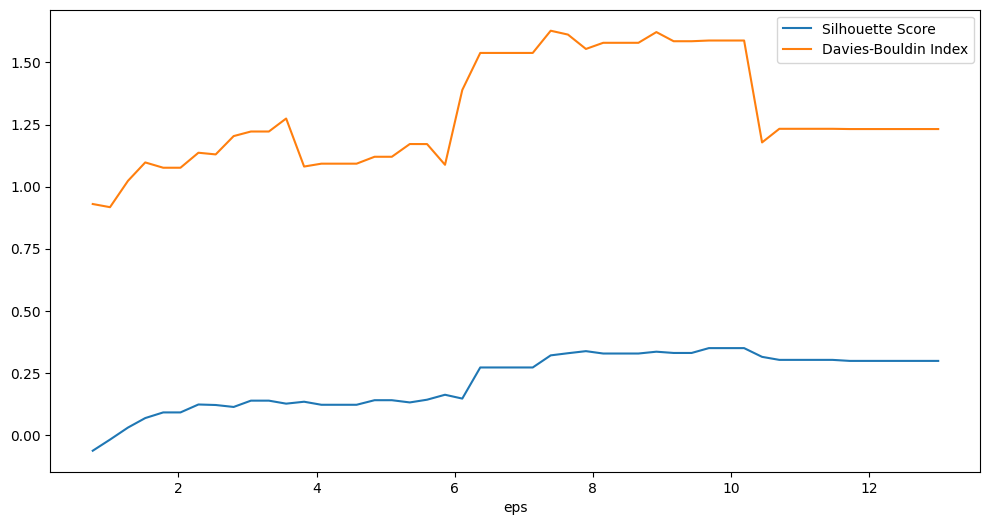

In [50]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

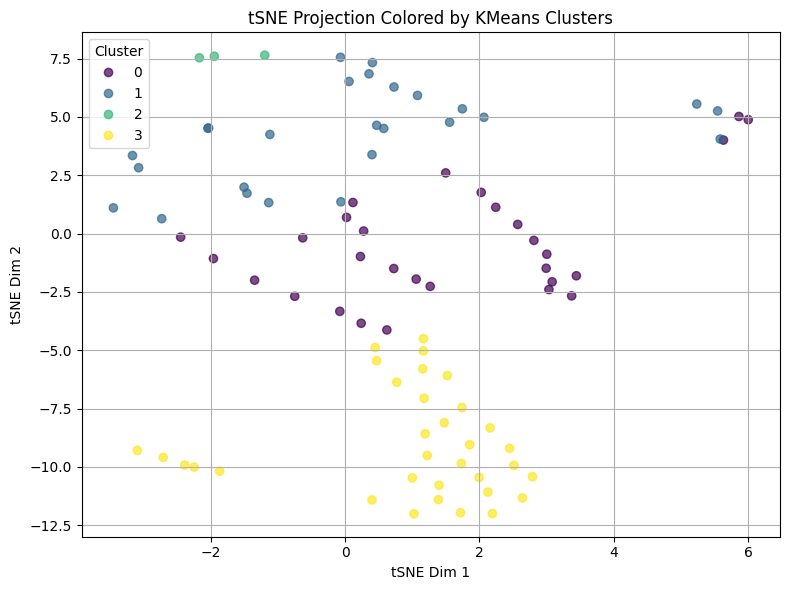

In [51]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.05            2         6    263          0.995544   
1    0.05            2         6    263          0.995544   
2    0.06            2         6    263          0.995544   
3    0.06            2         6    263          0.995544   
4    0.07            2         6    263          0.995544   
..    ...          ...       ...    ...               ...   
195  0.98            2        21    138          0.128982   
196  0.99            2        21    136          0.123476   
197  0.99            2        21    135          0.123509   
198  1.00            2        21    134          0.124259   
199  1.00            2        21    133          0.122700   

     Davies-Bouldin Index  
0                0.006072  
1                0.006072  
2                0.006072  
3                0.006072  
4                0.006072  
..                    ...  
195              0.575751  
196              0.574186  
197              0.579147  
198              0.585607  
199              0.585309  

[200 rows x 6 columns]

<Axes: xlabel='eps'>

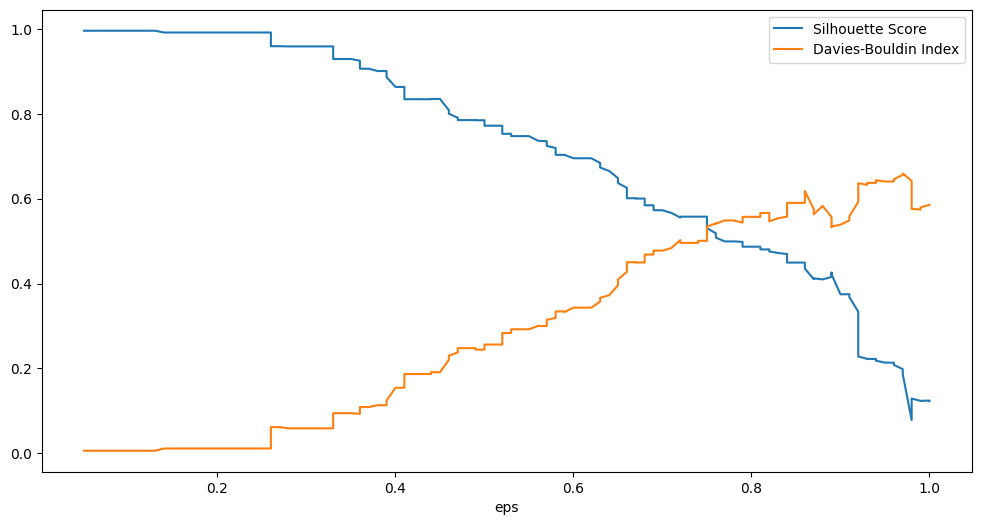

In [52]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 200)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

#### Winter (4)

In [53]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

In [54]:
season = 4
season_year = 2011
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids]
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 91 entries, 2011-12-01 to 2012-02-29
Columns: 262 entries, 10000009 to 9000015
dtypes: float64(262)
memory usage: 187.0 KB


None

            10000009  11000011  11000016  13000011  13000019  13000065  \
2011-12-01  0.838278  0.901633  1.270201  0.583039  0.796264  0.868610   
2011-12-02  0.844332  0.940809  1.387801  0.582559  0.816962  0.887603   
2011-12-03  0.919540  0.992754  1.835736  0.650149  1.153076  1.196028   
2011-12-04  1.128069  1.099640  2.362697  0.759725  1.614835  1.619749   
2011-12-05  1.269034  1.205559  2.027510  0.797375  1.618738  1.623330   
...              ...       ...       ...       ...       ...       ...   
2012-02-25  1.696341  1.721791  2.156513  1.049389  1.478185  1.494356   
2012-02-26  1.367941  1.750610  1.811062  0.943499  1.202144  1.241054   
2012-02-27  1.259759  1.726085  1.694518  0.956614  1.196343  1.235731   
2012-02-28  1.438916  1.703910  1.718533  0.979024  1.348787  1.375617   
2012-02-29  1.351574  1.699775  1.574404  0.866371  1.222844  1.260049   

            14000016  14000022  15000002  15000032  ...  64000025  66000014  \
2011-12-01  0.738312  0.831438  

          2011-12-01  2011-12-02  2011-12-03  2011-12-04  2011-12-05  \
10000009    0.102562   -0.017225   -0.208390   -0.451771   -0.416874   
11000011    0.194894    0.117159   -0.125872   -0.473376   -0.471837   
11000016    0.732030    0.739774    0.824229    0.486524    0.239893   
13000011   -0.269413   -0.381848   -0.512013   -0.731705   -0.825285   
13000019    0.041333   -0.055347    0.054821   -0.081837   -0.114064   
...              ...         ...         ...         ...         ...   
67000019   -0.655942   -0.472539   -0.521374   -0.568848   -0.607926   
7000003     0.337799    0.356476    0.382333    0.343425    0.845540   
8000001     0.306149    0.164321   -0.029579   -0.183321   -0.008432   
9000001     2.103575    1.510834    1.372702    0.806193    1.309137   
9000015     1.947846    1.394235    1.241534    0.687709    1.138573   

          2011-12-06  2011-12-07  2011-12-08  2011-12-09  2011-12-10  ...  \
10000009   -0.328194   -0.242719   -0.094507   -0.481649  

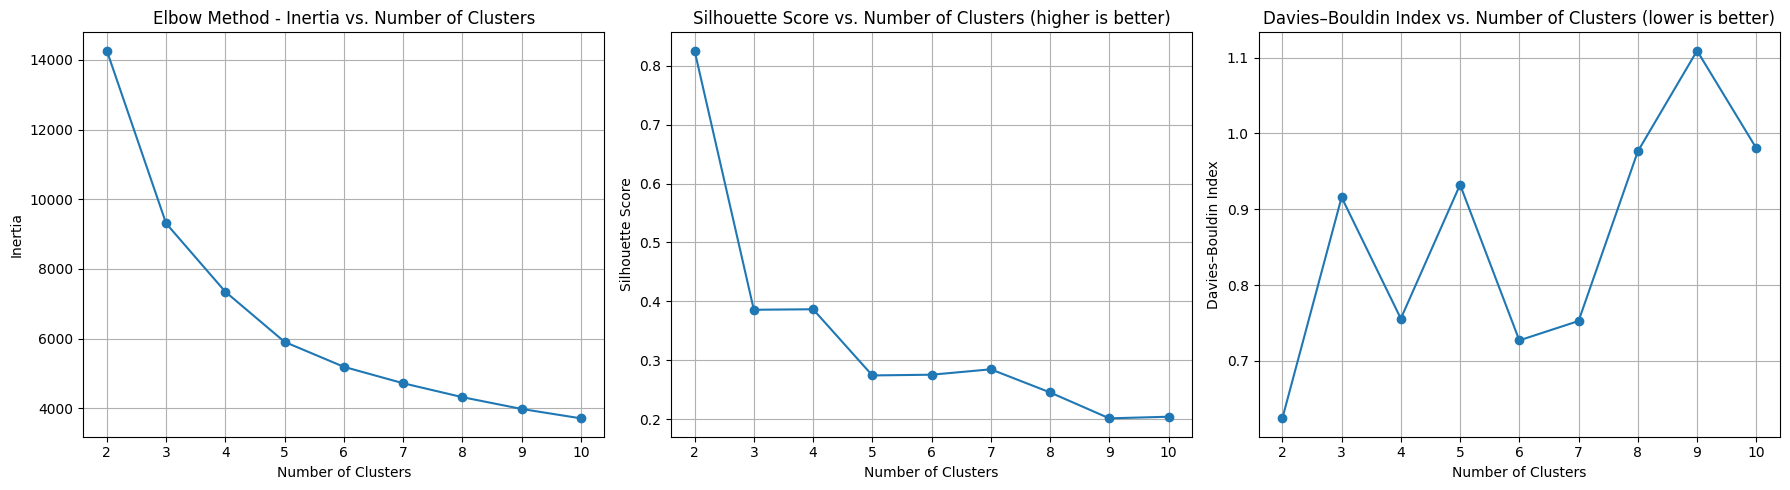

In [55]:
# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        0
11000011        2
11000016        2
13000011        0
13000019        0

            10000009  11000011  11000016  13000011  13000019  13000065  \
2011-12-01  0.838278  0.901633  1.270201  0.583039  0.796264  0.868610   
2011-12-02  0.844332  0.940809  1.387801  0.582559  0.816962  0.887603   
2011-12-03  0.919540  0.992754  1.835736  0.650149  1.153076  1.196028   
2011-12-04  1.128069  1.099640  2.362697  0.759725  1.614835  1.619749   
2011-12-05  1.269034  1.205559  2.027510  0.797375  1.618738  1.623330   
...              ...       ...       ...       ...       ...       ...   
2012-02-25  1.696341  1.721791  2.156513  1.049389  1.478185  1.494356   
2012-02-26  1.367941  1.750610  1.811062  0.943499  1.202144  1.241054   
2012-02-27  1.259759  1.726085  1.694518  0.956614  1.196343  1.235731   
2012-02-28  1.438916  1.703910  1.718533  0.979024  1.348787  1.375617   
2012-02-29  1.351574  1.699775  1.574404  0.866371  1.222844  1.260049   

            14000016  14000022  15000002  15000032  ...  64000025  66000014  \
2011-12-01  0.738312  0.831438  

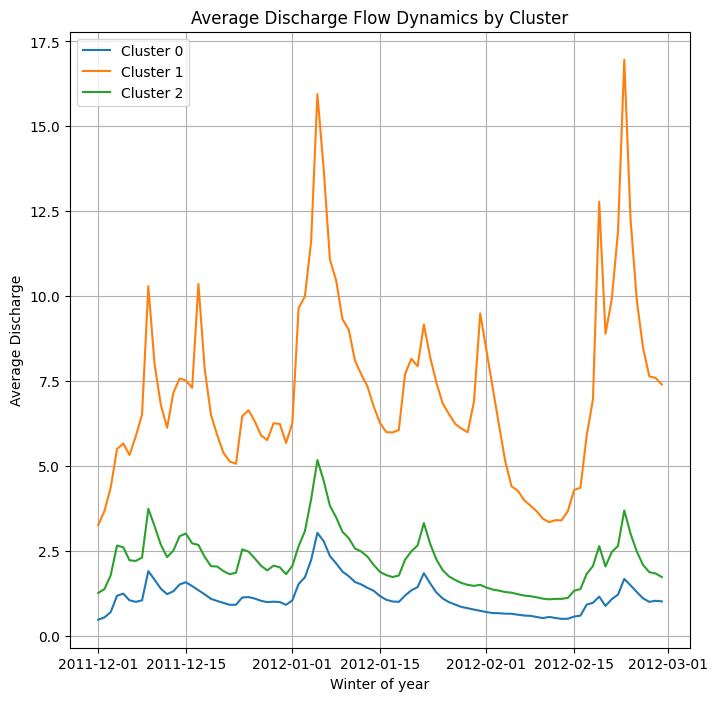

In [56]:
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure(figsize=(8, 8))
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Winter of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [57]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)

In [58]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  11000011  11000016  13000011  13000019  13000065  \
2011-12-01  0.838278  0.901633  1.270201  0.583039  0.796264  0.868610   
2011-12-02  0.844332  0.940809  1.387801  0.582559  0.816962  0.887603   
2011-12-03  0.919540  0.992754  1.835736  0.650149  1.153076  1.196028   
2011-12-04  1.128069  1.099640  2.362697  0.759725  1.614835  1.619749   
2011-12-05  1.269034  1.205559  2.027510  0.797375  1.618738  1.623330   
...              ...       ...       ...       ...       ...       ...   
2012-02-25  1.696341  1.721791  2.156513  1.049389  1.478185  1.494356   
2012-02-26  1.367941  1.750610  1.811062  0.943499  1.202144  1.241054   
2012-02-27  1.259759  1.726085  1.694518  0.956614  1.196343  1.235731   
2012-02-28  1.438916  1.703910  1.718533  0.979024  1.348787  1.375617   
2012-02-29  1.351574  1.699775  1.574404  0.866371  1.222844  1.260049   

            14000016  14000022  15000002  15000032  ...  64000025  66000014  \
2011-12-01  0.738312  0.831438  0.623025  0.690054  ...  0.126905  0.184129   
2011-12-02  0.752243  0.843811  0.638613  0.810135  ...  0.365049  0.341267   
2011-12-03  0.794714  0.881530  0.680037  0.645500  ...  0.440651  0.455608   
2011-12-04  1.025497  1.086499  1.004458  1.144075  ...  1.054509  0.710892   
2011-12-05  1.092756  1.146234  1.153752  1.274957  ...  1.815727  0.856571   
...              ...       ...       ...       ...  ...       ...       ...   
2012-02-25  1.296717  1.327380  0.820270  1.993519  ...  2.056579  4.752156   
2012-02-26  1.139023  1.187326  0.731038  1.487205  ...  1.564760  3.436638   
2012-02-27  1.065352  1.121896  0.698652  1.258538  ...  1.284210  2.541915   
2012-02-28  1.135873  1.184529  0.745462  1.335488  ...  1.299667  2.732434   
2012-02-29  1.094577  1.147851  0.710607  1.233254  ...  1.223967  2.725341   

            66000034  67000017  67000018  67000019   7000003   8000001  \
2011-12-01  0.612922  0.182343  0.176248  0.317814  0.999690  0.977973   
2011-12-02  0.934480  0.244047  0.328840  0.517450  1.112621  0.974668   
2011-12-03  1.815732  0.567533  0.669111  0.641843  1.443662  1.078191   
2011-12-04  3.702089  1.210282  1.353622  0.974016  2.174404  1.481301   
2011-12-05  3.683546  1.673062  1.337255  1.048395  2.726949  1.740728   
...              ...       ...       ...       ...       ...       ...   
2012-02-25  9.947441  4.877840  4.995259  8.384674  2.731728  2.147934   
2012-02-26  7.201858  3.559199  3.340784  6.321908  2.242909  1.723433   
2012-02-27  5.409687  2.652115  2.295133  5.071254  1.878368  1.545565   
2012-02-28  5.912637  2.836206  2.588236  4.815558  1.948332  1.638908   
2012-02-29  6.145035  2.811122  2.719062  4.379746  1.807778  1.518994   

             9000001   9000015  
2011-12-01  2.211314  2.104458  
2011-12-02  1.941365  1.857655  
2011-12-03  2.322372  2.205992  
2011-12-04  2.783325  2.627421  
2011-12-05  3.262340  3.065362  
...              ...       ...  
2012-02-25  2.082034  1.986263  
2012-02-26  1.906298  1.825595  
2012-02-27  1.685324  1.623569  
2012-02-28  1.698178  1.635320  
2012-02-29  1.649960  1.591237  

[91 rows x 262 columns]

<Axes: >

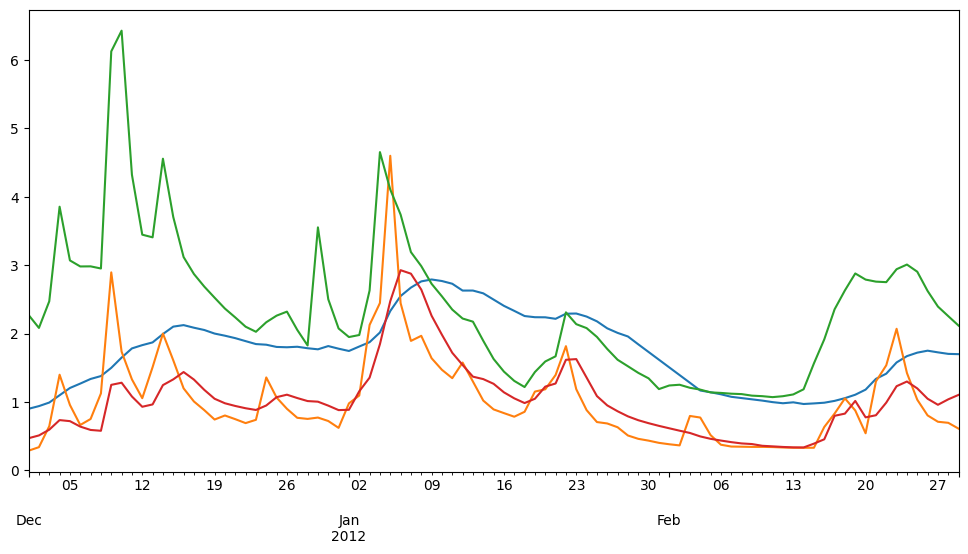

In [59]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

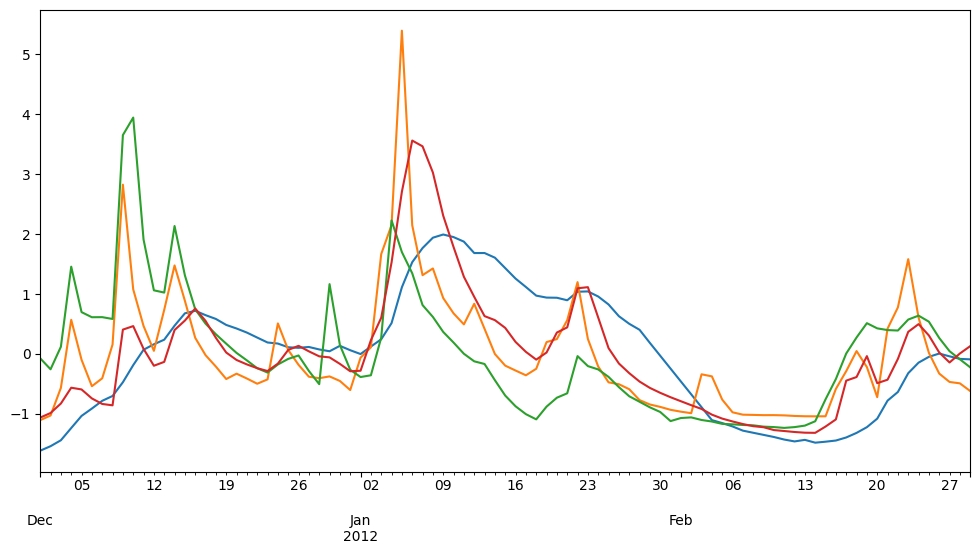

In [60]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

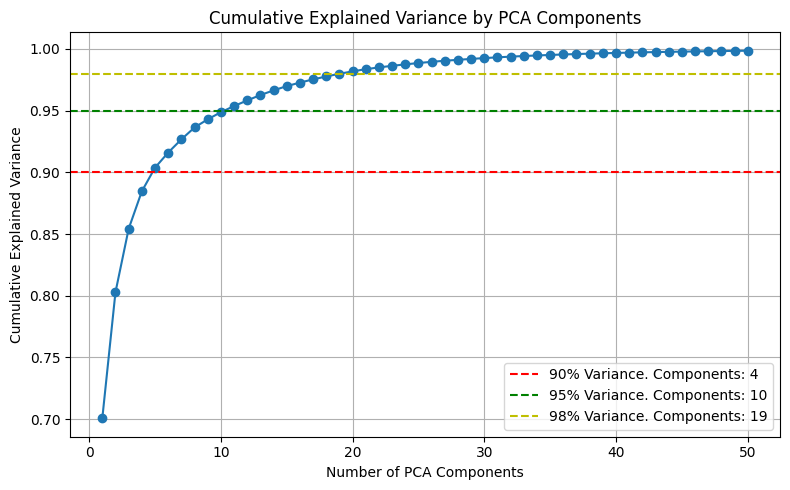

In [61]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [62]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[-18.51252826,  -6.11950659,   0.30681005, ...,  -0.79579115,
          1.02746693,  -0.68398868],
       [-16.64151367,  -6.28015192,   0.09973835, ...,  -0.73613452,
          1.06656072,  -0.60184734],
       [-11.64827404,  -8.26454625,  -1.15627172, ...,  -0.12237933,
          0.86817877,  -0.60526288],
       ...,
       [ -4.0857776 ,   2.32411824,  -0.96160064, ...,   0.23128427,
         -0.04000273,   0.30827395],
       [ -3.57833473,   2.80937324,  -1.95910657, ...,  -0.46043169,
          0.31925826,   0.97844224],
       [ -4.81150251,   3.73873953,  -2.2288744 , ...,  -0.64571831,
          0.34104491,   0.70775253]], shape=(91, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_3456\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


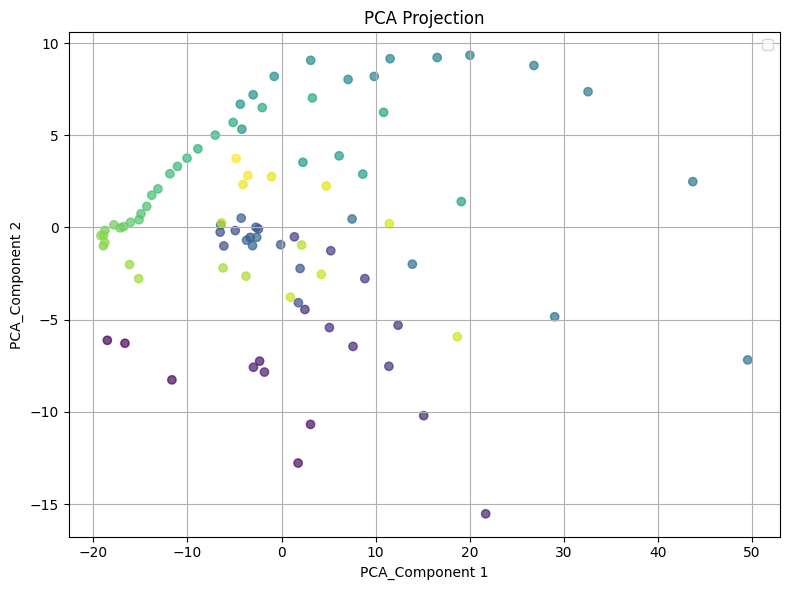

In [63]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_3456\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


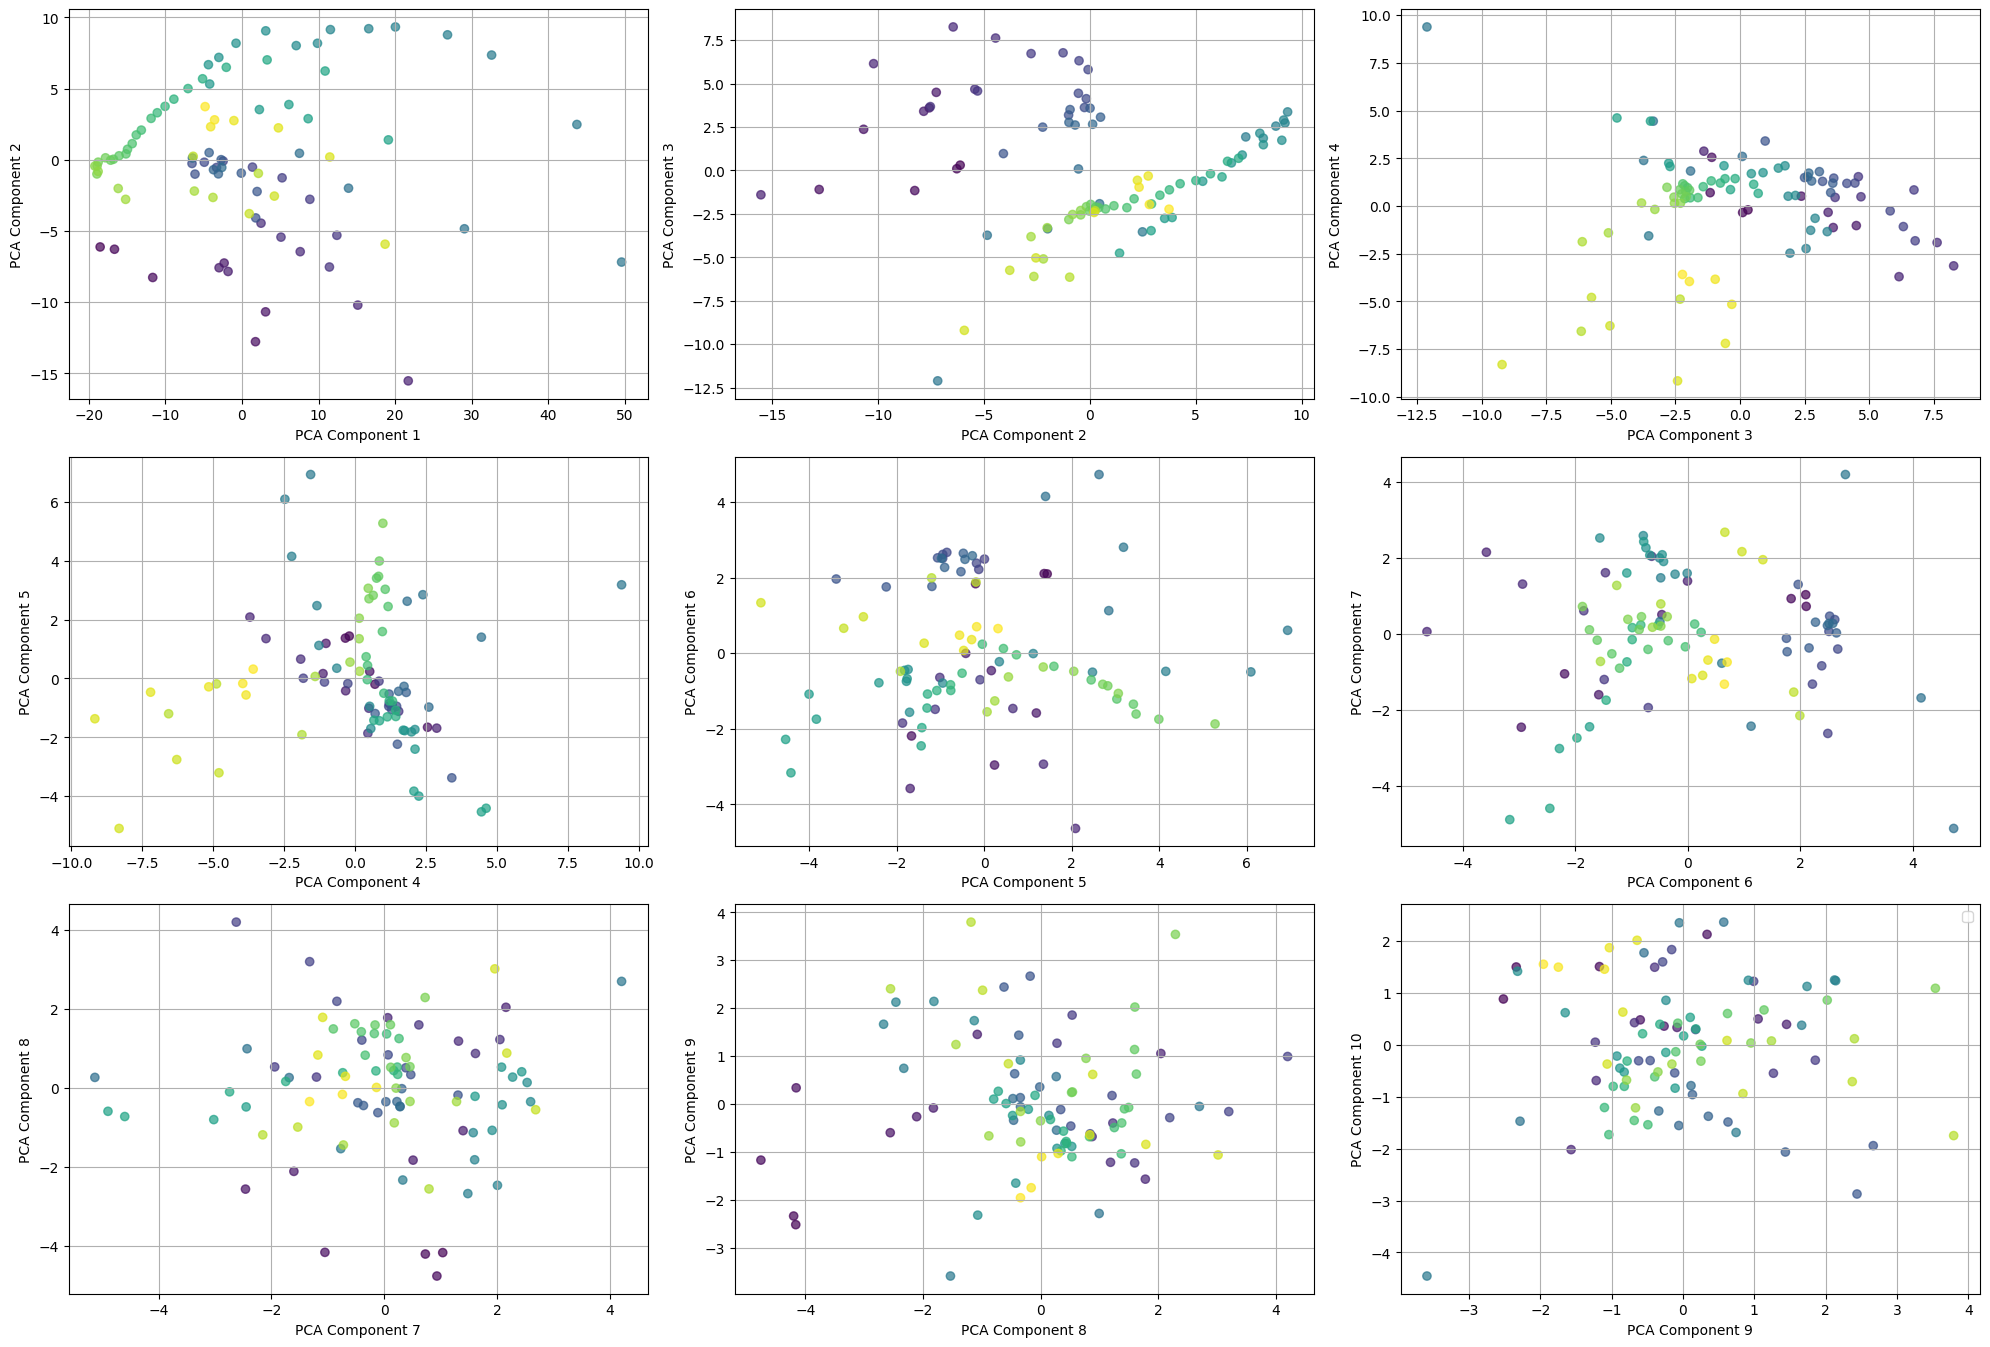

In [64]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [65]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.263
KMeans Davies-Bouldin Index is 1.311


<Axes: xlabel='k'>

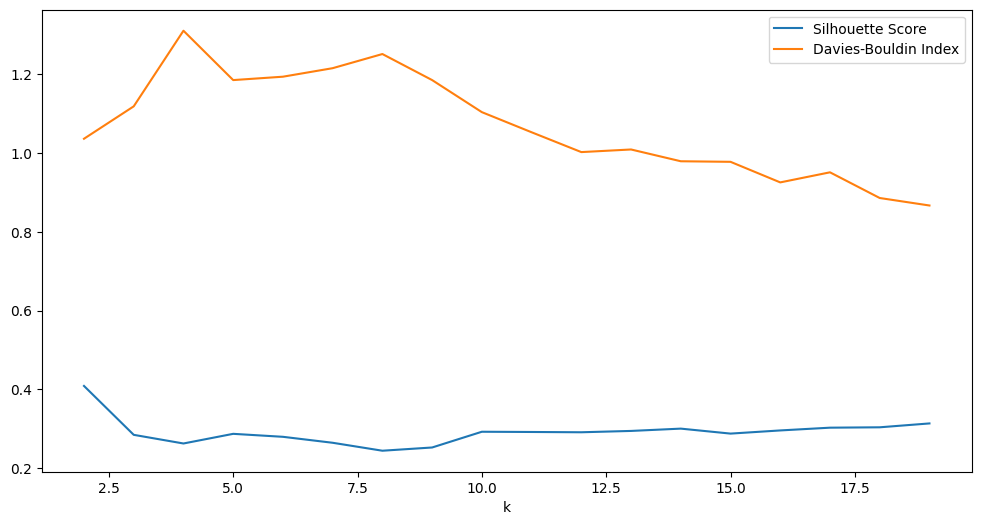

In [66]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         0     91               NaN   
1    0.76            3         0     91               NaN   
2    1.01            3         0     91               NaN   
3    1.27            3         0     91               NaN   
4    1.52            3         1     88               NaN   
5    1.78            3         2     85         -0.159182   
6    2.03            3         4     78         -0.186756   
7    2.29            3         6     66         -0.126588   
8    2.54            3         6     63         -0.090228   
9    2.80            3         6     59         -0.034295   
10   3.05            3         4     57         -0.000027   
11   3.31            3         4     56          0.006368   
12   3.56            3         5     49          0.059276   
13   3.82            3         6     43          0.056133   
14   4.07            3         6     42          0.058085   
15   4.33            3         6     42          0.058085   
16   4.58            3         6     40          0.077587   
17   4.84            3         5     40          0.043447   
18   5.09            3         5     39          0.040942   
19   5.35            3         5     36          0.056613   
20   5.60            3         5     36          0.056613   
21   5.86            3         5     34          0.061815   
22   6.11            3         6     31          0.067378   
23   6.37            3         7     27          0.085958   
24   6.62            3         8     24          0.093054   
25   6.88            3         8     24          0.093054   
26   7.13            3         9     21          0.107165   
27   7.39            3         9     18          0.114627   
28   7.64            3         7     11          0.049604   
29   7.90            3         5     11         -0.028825   
30   8.15            3         5     10         -0.033696   
31   8.41            3         5      9         -0.018196   
32   8.66            3         3      9         -0.012203   
33   8.92            3         1      9               NaN   
34   9.17            3         1      9               NaN   
35   9.43            3         1      9               NaN   
36   9.68            3         1      9               NaN   
37   9.94            3         1      9               NaN   
38  10.19            3         1      9               NaN   
39  10.45            3         1      8               NaN   
40  10.70            3         1      8               NaN   
41  10.96            3         1      8               NaN   
42  11.21            3         1      7               NaN   
43  11.47            3         1      7               NaN   
44  11.72            3         1      7               NaN   
45  11.98            3         1      7               NaN   
46  12.23            3         1      5               NaN   
47  12.49            3         1      5               NaN   
48  12.74            3         1      5               NaN   
49  13.00            3         1      5               NaN   

    Davies-Bouldin Index  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN  
5               1.078682  
6               1.162951  
7               1.347057  
8               1.288946  
9               1.316467  
10              1.308169  
11              1.339793  
12              1.271390  
13              1.375370  
14              1.390860  
15              1.390860  
16              1.390689  
17              1.442442  
18              1.460913  
19              1.476197  
20              1.476197  
21              1.403465  
22              1.530912  
23              1.309322  
24              1.323671  
25              1.323671  
26              1.458817  
27              1.428478  
28              1.341767  
29              1.383928  
30              1.384968  
31              1.331838  
32 

<Axes: xlabel='eps'>

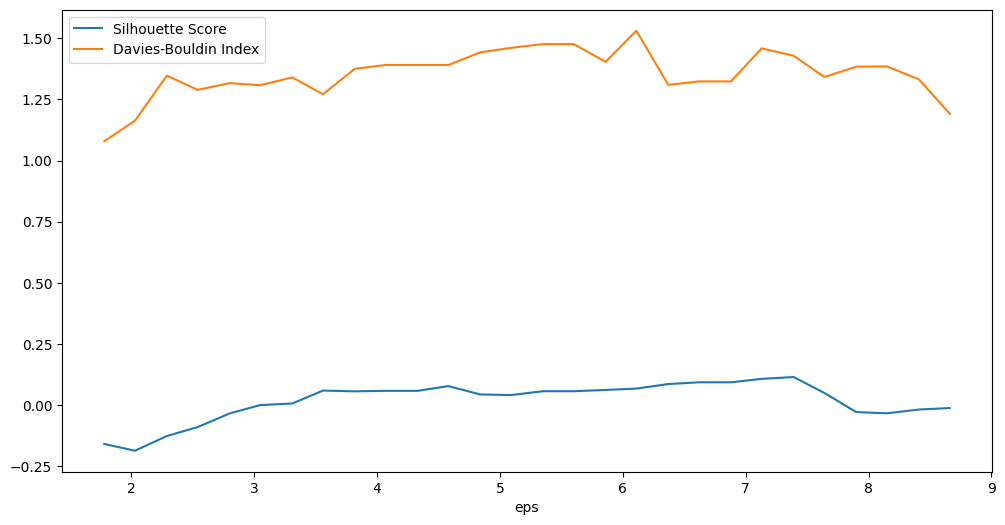

In [67]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

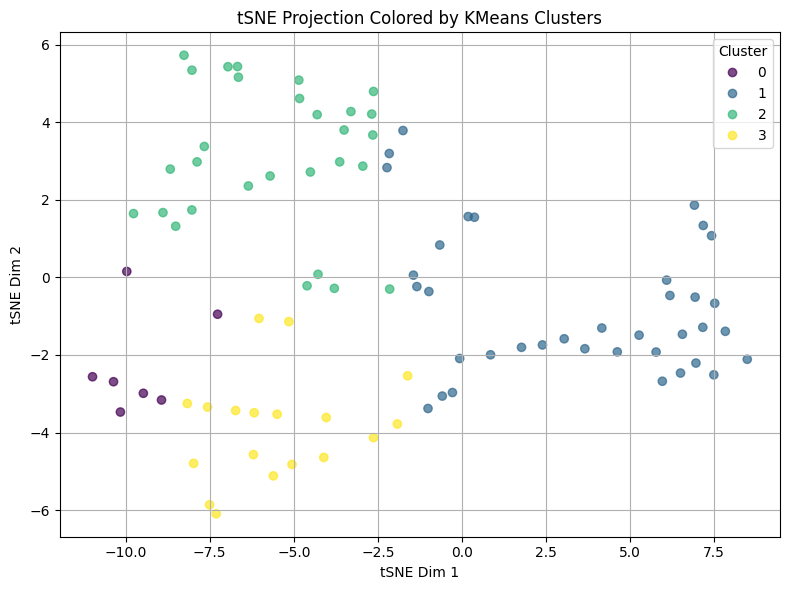

In [68]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.05            2         6    250          0.996588   
1    0.05            2         6    250          0.996588   
2    0.06            2         6    250          0.996588   
3    0.06            2         6    250          0.996588   
4    0.07            2         6    250          0.996588   
..    ...          ...       ...    ...               ...   
195  0.98            2        33    126          0.403534   
196  0.99            2        32    126          0.412184   
197  0.99            2        32    126          0.412184   
198  1.00            2        32    126          0.412184   
199  1.00            2        32    125          0.408665   

     Davies-Bouldin Index  
0                0.003059  
1                0.003059  
2                0.003059  
3                0.003059  
4                0.003059  
..                    ...  
195              0.658655  
196              0.655968  
197              0.655968  
198              0.655968  
199              0.659681  

[200 rows x 6 columns]

<Axes: xlabel='eps'>

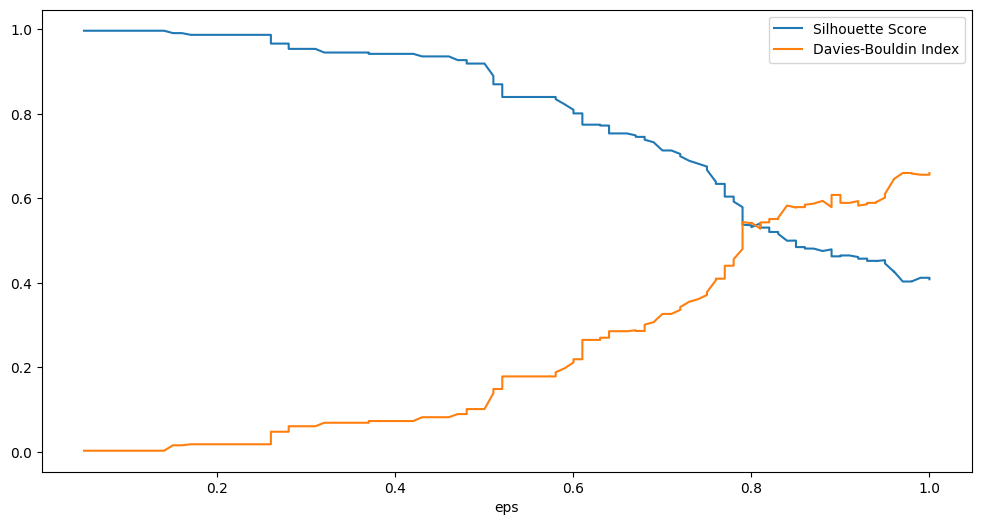

In [69]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 200)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))